#Table of Contents<br/>
1. [Import required packages](#import)
2. [Information retrieval](#rtv)
3. [Patients summary table](#sum)
4. [Patients segmentations](#seg)
5. [Word2Vec](#wv)

## 1. Import required packages <a id='import'>

In [0]:
import pandas as pd
import spacy
from spacy import displacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

We can import the data from cloud stores using the following command

In [2]:
!wget https://www.dropbox.com/s/38ijkj2ce0bllpe/cancer_data.xls

--2019-06-01 18:36:17--  https://www.dropbox.com/s/38ijkj2ce0bllpe/cancer_data.xls
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/38ijkj2ce0bllpe/cancer_data.xls [following]
--2019-06-01 18:36:17--  https://www.dropbox.com/s/raw/38ijkj2ce0bllpe/cancer_data.xls
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd89ebb155a56a2d7e8e661b6f6.dl.dropboxusercontent.com/cd/0/inline/AiCshY6gvxGPscJnA4IFdUyyV04iWe8ZdUz9_IcbbY_vawLCffGApOktRDHWBD0uixsaHCbiJYh8pIf9WDl86dnRD6k8HiiaKkLi9qmDBzDjTA/file# [following]
--2019-06-01 18:36:18--  https://ucd89ebb155a56a2d7e8e661b6f6.dl.dropboxusercontent.com/cd/0/inline/AiCshY6gvxGPscJnA4IFdUyyV04iWe8ZdUz9_IcbbY_vawLCffGApOktRDHWBD0uixsaHCbiJYh8pIf9WDl86dnRD6k8HiiaKkLi9qmDBzDjTA/file
Resolving 

In [0]:
df=pd.read_csv('cancer_data.xls')

**Load spacy and we keep English as our language**

In [0]:
nlp=spacy.load('en')

In [5]:
df.head(20)

,Unnamed: 0,Detail,Stage,Diagnosis_Year,Location,Care_team
0,0,I was born and raised in a small town on Long ...,Cancer:Breast Cancer - Stage IIB,Diagnosed:2015,Treatement at:Philadelphia,Care teamSramila AithalJohn G. Fernandez
1,1,"When I was 55 years old, I began having troubl...",Cancer:Esophageal Cancer - Stage IVA,Diagnosed:2012,NaN,NaN
2,2,"In early 2014, I took my doctor’s advice and h...",Cancer:Uterine Cancer - Stage III,Diagnosed:2014,NaN,NaN
3,3,In 2011 I started having acid reflux It w...,Cancer Prostate Cancer Stage IIB,Diagnosed 2011,NaN,NaN
4,4,My story begins with numbness. One day in 2012...,Cancer:Brain Cancer - Stage II,Diagnosed:2015,NaN,NaN
5,5,For more than 20 years I had a small lump ...,Cancer Non Hodgkin Lymphoma Low grade B c...,Diagnosed 2009,NaN,NaN
6,6,Looking back today I can see that I d been...,Cancer Esophageal Cancer Stage II,Diagnosed 2008,NaN,NaN
7,7,Many women are used to receiving the do ov...,Cancer Breast Cancer Stage 0,Diagnosed 2008,NaN,NaN
8,8,Some time in 2011 I noticed I was putting ...,Cancer Non Hodgkin Lymphoma Stage IV,Diagnosed 2012,NaN,NaN
9,9,Five years before I was diagnosed I was wo...,Cancer Pancreatic Cancer Stage IV,Diagnosed 2012,NaN,NaN


In [0]:
del df['Unnamed: 0']

## 2. Information  retrieval <a id='rtv'>

**We start with first document i.e. detail of first patient**

In [0]:
doc1=nlp(df.iloc[0,0])

**Let's do sentence tokenization**<br/>
It helps us to segregate the one sentence from other and it will help us in dependency parsing that we will show in subsequent stages

In [0]:
documents=[]
for doc in doc1.sents:
  documents.append(doc.text)

In [9]:
print('Number of sentences :\n',len(documents))
print('First 7 seven sentences')
documents

Number of sentences :
 105
First 7 seven sentences


['I was born and raised in a small town on Long Island in New York.',
 'I live there today with my husband and three wonderful children.',
 'I work as an assistant principal in the same school district my children attend.',
 'I live a beautiful life there, taking advantage of the water and often enjoying time out on the boat.',
 'One day in September 2015, I felt a lump in my left breast.',
 'I am not an alarmist, but I am also very educated and aware of what that could mean.',
 'I had an appointment scheduled in a month with my OB/GYN, so at first, I thought I would wait and talk to my doctor about it then.',
 'I had a mammogram just six months prior, so I figured that it was nothing.',
 'But I did some online research and decided that to be safe, I should schedule something sooner.',
 'I have known my doctor for years, since she delivered my children.',
 'During my exam, she agreed that something wasn’t right and walked me directly over to the radiology department.',
 'I stayed for t

Visualize syntactic parsing for the 1st document

In [0]:
options={'compact':True,'bg':'seagreen','color':'#fff','font':'Sans Sarif'}

In [11]:
displacy.render(doc1,style='dep',jupyter=True,options=options)

In [12]:
spacy.explain('cc')

'coordinating conjunction'

**Let's see the most frequent words across doc1**

In [0]:
nouns=[token.text for token in doc1 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']

In [0]:
freq_noun=Counter(nouns)

In [15]:
pd.DataFrame(freq_noun.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,time,10
1,surgeon,10
2,cancer,9
3,oncologist,8
4,breast,7
5,treatment,6
6,care,6
7,results,5
8,tissue,5
9,husband,4


<Figure size 432x288 with 0 Axes>

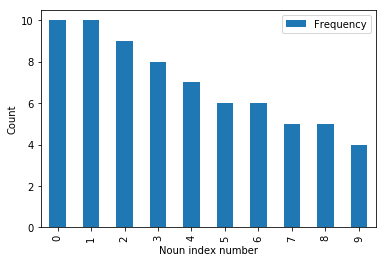

In [16]:
noun1_df=pd.DataFrame(freq_noun.most_common(10),columns=['Noun','Frequency'])
plt.figure(figsize=[6,4])
noun1_df.plot(kind='bar')
plt.xlabel('Noun index number')
plt.ylabel('Count')
plt.show()

In [0]:
#for x,token in enumerate(doc1):
  #print(x,token.text,token.dep_,token.head.text)

##Information retrieval 

### Dependency parsing

**Cancer site :** <br/>
It's important to know. Since breast has appeared 7 times in the entire document, so let us confirm it through checking its appearance in 7 different sentences.

In [18]:
breast=[sent for sent in doc1.sents if 'breast' in sent.string.lower()]
for i in range(7):
  sentence=breast[i]
  print("Sentence No. :", i+1)
  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
One :  [day, felt]
day :  [felt]
in :  [day, felt]
September :  [in, day, felt]
2015 :  [September, in, day, felt]
, :  [felt]
I :  [felt]
felt :  []
a :  [lump, felt]
lump :  [felt]
in :  [lump, felt]
my :  [breast, in, lump, felt]
left :  [breast, in, lump, felt]
breast :  [in, lump, felt]
. :  [felt]
Sentence No. : 2
He :  [did]
did :  []
an :  [MRI, did]
MRI :  [did]
on :  [did]
both :  [on, did]
of :  [both, on, did]
my :  [breasts, of, both, on, did]
breasts :  [of, both, on, did]
. :  [did]
Sentence No. : 3
Then :  [came]
a :  [few, days, later, came]
few :  [days, later, came]
days :  [later, came]
later :  [came]
, :  [came]
the :  [results, came]
results :  [came]
came :  []
back :  [came]
that :  [showed, results, came]
showed :  [results, came]
another :  [lump, showed, results, came]
lump :  [showed, results, came]
in :  [lump, showed, results, came]
the :  [breast, in, lump, showed, results, came]
left :  [breast, in, lump, showed, results, came]
breast :

**Stage**

In [19]:
stage=[sent for sent in doc1.sents if 'stage' in sent.string.lower()]
sentence=stage[0]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))

I :  [found]
found :  []
out :  [found]
I :  [had, stage, found]
had :  [stage, found]
stage :  [found]
IIB :  [cancer, stage, found]
breast :  [cancer, stage, found]
cancer :  [stage, found]
, :  [stage, found]
and :  [stage, found]


She was diagnosed with stage II Breast cancer

**Chemotherapy ?**

In [20]:
chemo=[sent for sent in doc1.sents if 'chemotherapy' in sent.string.lower()]
for i in range(2):
  sentence=chemo[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
I :  [had]
had :  []
six :  [rounds, had]
rounds :  [had]
of :  [rounds, had]
chemotherapy :  [of, rounds, had]
. :  [had]
Sentence No. : 2
After :  [met]
completing :  [After, met]
my :  [round, completing, After, met]
third :  [round, completing, After, met]
round :  [completing, After, met]
of :  [round, completing, After, met]
chemotherapy :  [of, round, completing, After, met]
, :  [met]
I :  [met]
met :  []
with :  [met]
a :  [surgeon, with, met]
plastic :  [surgeon, with, met]
surgeon :  [with, met]
. :  [met]


She underwent six rounds of chemotherapy

**Surgery ?**<br/>
Surgery is common in Surgical Oncology. Let's see if she underwent surgery. Since surgeon appeared 10 times in the entire document, so parsing the word can discharge fruitful result.

In [21]:
surgeon=[sent for sent in doc1.sents if 'surgeon' in sent.string.lower()]
for i in range(10):
  sentence=surgeon[i]
  print("Sentence No. :", i+1)
  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [images, concerning]
images :  [concerning]
were :  [concerning]
concerning :  []
, :  [concerning]
so :  [recommended, concerning]
it :  [recommended, concerning]
was :  [recommended, concerning]
recommended :  [concerning]
that :  [see, recommended, concerning]
I :  [see, recommended, concerning]
see :  [recommended, concerning]
a :  [surgeon, see, recommended, concerning]
surgeon :  [see, recommended, concerning]
for :  [surgeon, see, recommended, concerning]
a :  [biopsy, for, surgeon, see, recommended, concerning]
biopsy :  [for, surgeon, see, recommended, concerning]
. :  [recommended, concerning]
Sentence No. : 2
Because :  [know, referred]
I :  [know, referred]
did :  [know, referred]
n’t :  [know, referred]
know :  [referred]
any :  [surgeons, know, referred]
surgeons :  [know, referred]
, :  [referred]
I :  [referred]
was :  [referred]
referred :  []
to :  [referred]
one :  [to, referred]
. :  [referred]
Sentence No. : 3
I :  [saw]
saw :  []
the :  [su

In [22]:
'''surgeon=[sent for sent in doc1.sents if 'surgeon' in sent.string.lower()]
sentence=surgeon[8]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))'''

"surgeon=[sent for sent in doc1.sents if 'surgeon' in sent.string.lower()]\nsentence=surgeon[8]\nfor word in sentence:\n  print(word, ': ', str(list(word.ancestors)))"

In [23]:
'''surgeon=[sent for sent in doc1.sents if 'surgeon' in sent.string.lower()]
sentence=surgeon[9]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))'''

"surgeon=[sent for sent in doc1.sents if 'surgeon' in sent.string.lower()]\nsentence=surgeon[9]\nfor word in sentence:\n  print(word, ': ', str(list(word.ancestors)))"

**Transplant ?**<br/>
Because transplant is common enough in surgical Oncology. Since in transplant procedure tissue is grafted and ***tissue*** has appeared 5 times, so let's confirm  it.

In [24]:
tissue=[sent for sent in doc1.sents if 'tissue' in sent.string.lower()]
for i in range(4):
  sentence=tissue[i]
  print("Sentence No. :", i+1)

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
In :  [underwent]
April :  [In, underwent]
2016 :  [April, In, underwent]
, :  [underwent]
I :  [underwent]
underwent :  []
a :  [mastectomy, underwent]
double :  [mastectomy, underwent]
mastectomy :  [underwent]
and :  [mastectomy, underwent]
tissue :  [mastectomy, underwent]
flap :  [reconstruction, tissue, mastectomy, underwent]
reconstruction :  [tissue, mastectomy, underwent]
. :  [underwent]
Sentence No. : 2
The :  [procedure, used]
tissue :  [procedure, used]
flap :  [procedure, used]
procedure :  [used]
used :  []
tissue :  [used]
from :  [used]
other :  [parts, from, used]
parts :  [from, used]
of :  [parts, from, used]
my :  [body, of, parts, from, used]
body :  [of, parts, from, used]
to :  [rebuild, used]
rebuild :  [used]
the :  [shape, rebuild, used]
breast :  [shape, rebuild, used]
shape :  [rebuild, used]
. :  [used]
Sentence No. : 3
I :  [made]
made :  []
the :  [decision, made]
decision :  [made]
to :  [use, decision, made]
use :  [decision, made]
my 

Breast removal was done and tissue from other site was used for breast implant.

**Family**

In [25]:
family=[sent for sent in doc1.sents if 'husband' in sent.string.lower()]
sentence=family[0]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))

I :  [live]
live :  []
there :  [live]
today :  [live]
with :  [live]
my :  [husband, with, live]
husband :  [with, live]
and :  [husband, with, live]
three :  [children, husband, with, live]
wonderful :  [children, husband, with, live]
children :  [husband, with, live]
. :  [live]


She is married with 3 children

In [0]:
adj=[token.text for token in doc1 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']

In [27]:
freq_adj=Counter(adj)
pd.DataFrame(freq_adj.most_common(30),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,6
1,surgical,3
2,medical,3
3,wonderful,2
4,left,2
5,able,2
6,general,2
7,wide,2
8,new,2
9,initial,2


**How is the patient now ?**<br/>
Happy/Unhappy

In [28]:
beautiful=[sent for sent in doc1.sents if 'beautiful' in sent.string.lower()]
sentence=beautiful[0]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))

I :  [live]
live :  []
a :  [life, live]
beautiful :  [life, live]
life :  [live]
there :  [life, live]
, :  [live]
taking :  [live]
advantage :  [taking, live]
of :  [taking, live]
the :  [water, of, taking, live]
water :  [of, taking, live]
and :  [taking, live]
often :  [enjoying, taking, live]
enjoying :  [taking, live]
time :  [enjoying, taking, live]
out :  [enjoying, taking, live]
on :  [out, enjoying, taking, live]
the :  [boat, on, out, enjoying, taking, live]
boat :  [on, out, enjoying, taking, live]
. :  [live]


She is living a happy life now with family after getting recovery

In [29]:
nice=[sent for sent in doc1.sents if 'nice' in sent.string.lower()]
sentence=nice[0]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))

What :  [was, was]
was :  [was]
nice :  [was, was]
was :  []
that :  [had, was]
while :  [was, had, was]
I :  [was, had, was]
was :  [had, was]
home :  [was, had, was]
, :  [had, was]
I :  [had, was]
still :  [had, was]
had :  [was]
the :  [support, had, was]
support :  [had, was]
of :  [support, had, was]
the :  [doctors, of, support, had, was]
doctors :  [of, support, had, was]
and :  [doctors, of, support, had, was]
clinicians :  [doctors, of, support, had, was]
at :  [doctors, of, support, had, was]
CTCA :  [at, doctors, of, support, had, was]
. :  [was]


**Conclusion :** She received comprehensive treatment from healthcare provider

**Let's study the medical detail of 2nd patient**

In [0]:

doc2=nlp(df.iloc[1,0])

In [31]:
doc2

When I was 55 years old, I began having trouble swallowing occasionally. Initially, I suspected that I may have a hiatal hernia because the pain I was experiencing was similar to the pain my father complained about when he had a hiatal hernia. But I didn’t doing anything about it because I was my mother’s primary caregiver and was focused on setting up a rigorous health procedure for her. Once her care was settled, I called my doctor. After learning of my pain, my physician also suspected I had a hiatal hernia, or possibly esophageal narrowing. He wanted to know more before recommending treatment, so he referred me to a gastrointestinal specialist at a local clinic for an endoscopy. After the endoscopy, the gastrointestinal specialist told me and my wife that there was a tumor at the bottom of my esophagus that appeared to be cancerous. He told me I should have blood tests and a CT scan. My blood was drawn that afternoon and I had a CT scan the following day. On the day I learned of my

**Let's do POS_TAG on 2nd document**

In [0]:
pos_tag=[]
for token in doc2:
  pos_tag.append([token.text,token.pos_])
  

In [33]:
pd.DataFrame(pos_tag,columns=['Token','POS']).head(10)

,Token,POS
0,When,ADV
1,I,PRON
2,was,VERB
3,55,NUM
4,years,NOUN
5,old,ADJ
6,",",PUNCT
7,I,PRON
8,began,VERB
9,having,VERB


**Let's do Entity_Tagging on 2nd document**

In [0]:
ner_tag=[]
for token in doc2.ents:
  ner_tag.append([token.text,token.label_])
  

In [35]:
pd.DataFrame(ner_tag,columns=['Token','Entity']).head(15)

,Token,Entity
0,55 years old,DATE
1,CT,ORG
2,CT,ORG
3,Cancer Treatment Centers of America,ORG
4,CTCA,ORG
5,CTCA,ORG
6,first,ORDINAL
7,CTCA,GPE
8,second,ORDINAL
9,The next morning,TIME


Spacy can understand automatically that 55 years old is DATE, CTCA is an Organization, first is ORDINAL(Numeric)

#### If we fail to undeerstand any POS or Entity we can ask SpaCy to provide explanation for that

In [36]:
spacy.explain('GPE')

'Countries, cities, states'

In [0]:
documents2=[]
for doc in doc2.sents:
  documents2.append(doc.text)

In [38]:
print('Number of sentences :\n',len(documents2))
print('First 7 seven sentences')
documents2[:7]

Number of sentences :
 63
First 7 seven sentences


['When I was 55 years old, I began having trouble swallowing occasionally.',
 'Initially, I suspected that I may have a hiatal hernia because the pain I was experiencing was similar to the pain my father complained about when he had a hiatal hernia.',
 'But I didn’t doing anything about it because I was my mother',
 '’s primary caregiver and was focused on setting up a rigorous health procedure for her.',
 'Once her care was settled, I called my doctor.',
 'After learning of my pain, my physician also suspected I had a hiatal hernia, or possibly esophageal narrowing.',
 'He wanted to know more before recommending treatment, so he referred me to a gastrointestinal specialist at a local clinic for an endoscopy.']

**Let's see the most frequent words across doc2**

In [0]:
nouns_doc2=[token.text for token in doc2 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']

In [40]:
freq_noun2=Counter(nouns_doc2)
pd.DataFrame(freq_noun2.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,treatment,10
1,day,7
2,tumor,5
3,scan,4
4,representative,4
5,cancer,4
6,days,4
7,chemotherapy,4
8,hernia,3
9,pain,3


**Cance site**

In [41]:
cancer2=[sent for sent in doc2.sents if 'cancer' in sent.string.lower()]
for i in range(4):
  sentence=cancer2[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
After :  [told]
the :  [endoscopy, After, told]
endoscopy :  [After, told]
, :  [told]
the :  [specialist, told]
gastrointestinal :  [specialist, told]
specialist :  [told]
told :  []
me :  [told]
and :  [me, told]
my :  [wife, me, told]
wife :  [me, told]
that :  [was, told]
there :  [was, told]
was :  [told]
a :  [tumor, was, told]
tumor :  [was, told]
at :  [tumor, was, told]
the :  [bottom, at, tumor, was, told]
bottom :  [at, tumor, was, told]
of :  [bottom, at, tumor, was, told]
my :  [esophagus, of, bottom, at, tumor, was, told]
esophagus :  [of, bottom, at, tumor, was, told]
that :  [appeared, bottom, at, tumor, was, told]
appeared :  [bottom, at, tumor, was, told]
to :  [be, appeared, bottom, at, tumor, was, told]
be :  [appeared, bottom, at, tumor, was, told]
cancerous :  [be, appeared, bottom, at, tumor, was, told]
. :  [told]
Sentence No. : 2
We :  [seen]
had :  [seen]
seen :  []
commercials :  [seen]
for :  [commercials, seen]
Cancer :  [Centers, for, comm

Cancer in Esophagus, Esopahgal cancer

**Stage**

In [42]:
stage_doc2=[sent for sent in doc2.sents if 'stage' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc2[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
my :  [consultation, said]
three :  [day, consultation, said]
- :  [day, consultation, said]
day :  [consultation, said]
consultation :  [said]
at :  [consultation, said]
CTCA :  [at, consultation, said]
, :  [CTCA, at, consultation, said]
Dr. :  [Kazmi, at, consultation, said]
Shayma :  [Kazmi, at, consultation, said]
Kazmi :  [at, consultation, said]
, :  [Kazmi, at, consultation, said]
my :  [oncologist, Kazmi, at, consultation, said]
medical :  [oncologist, Kazmi, at, consultation, said]
oncologist :  [Kazmi, at, consultation, said]
, :  [Kazmi, at, consultation, said]
said :  []
that :  [was, said]
the :  [tumor, was, said]
tumor :  [was, said]
was :  [said]
about :  [3, cm, was, said]
3 :  [cm, was, said]
cm :  [was, said]
and :  [was, said]
the :  [cancer, was, was, said]
cancer :  [was, was, said]
was :  [was, said]
at :  [was, was, said]
stage :  [IVA, at, was, was, said]
IVA :  [at, was, was, said]
. :  [said]


The patient was diagnosed with stage IV cancer

**Chemotherapy ?**

In [43]:
chemo2=[sent for sent in doc2.sents if 'chemotherapy' in sent.string.lower()]
for i in range(4):
  sentence=chemo2[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
My :  [infusion, was]
first :  [infusion, was]
chemotherapy :  [infusion, was]
infusion :  [was]
was :  []
that :  [day, was]
day :  [was]
. :  [was]
Sentence No. : 2
The :  [week, started]
following :  [week, started]
week :  [started]
, :  [started]
I :  [started]
started :  []
radiation :  [therapy, started]
therapy :  [started]
  :  [therapy, started]
and :  [started]
had :  [started]
a :  [port, had, started]
power :  [port, had, started]
port :  [had, started]
inserted :  [port, had, started]
for :  [inserted, port, had, started]
the :  [rest, for, inserted, port, had, started]
rest :  [for, inserted, port, had, started]
of :  [rest, for, inserted, port, had, started]
my :  [chemotherapy, of, rest, for, inserted, port, had, started]
intravenous :  [chemotherapy, of, rest, for, inserted, port, had, started]
chemotherapy :  [of, rest, for, inserted, port, had, started]
. :  [started]
Sentence No. : 3
I :  [had]
had :  []
chemotherapy :  [had]
every :  [Monday, had]

It's observed that the patient received both Chemotherapy and radiation

**Surgery**<br/>
No surgery was performed

In [44]:
freq_noun2=='surgery'

False

**Recovery**

In [45]:
treatment=[sent for sent in doc2.sents if 'treatment' in sent.string.lower()]
for i in range(10):
  sentence=treatment[i]
  print("Sentence No. :", i+1)
  for word in sentence:
    
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
He :  [wanted, referred]
wanted :  [referred]
to :  [know, wanted, referred]
know :  [wanted, referred]
more :  [know, wanted, referred]
before :  [know, wanted, referred]
recommending :  [before, know, wanted, referred]
treatment :  [recommending, before, know, wanted, referred]
, :  [referred]
so :  [referred]
he :  [referred]
referred :  []
me :  [referred]
to :  [referred]
a :  [specialist, to, referred]
gastrointestinal :  [specialist, to, referred]
specialist :  [to, referred]
at :  [specialist, to, referred]
a :  [clinic, at, specialist, to, referred]
local :  [clinic, at, specialist, to, referred]
clinic :  [at, specialist, to, referred]
for :  [specialist, to, referred]
an :  [endoscopy, for, specialist, to, referred]
endoscopy :  [for, specialist, to, referred]
. :  [referred]
Sentence No. : 2
On :  [learned, researching]
the :  [day, On, learned, researching]
day :  [On, learned, researching]
I :  [learned, researching]
learned :  [researching]
of :  [learne

**Most frequent Adjective**

In [0]:
adj_doc2=[token.text for token in doc2 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']

In [47]:
freq_adj2=Counter(adj_doc2)
pd.DataFrame(freq_adj2.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,5
1,hiatal,3
2,similar,2
3,gastrointestinal,2
4,local,2
5,cancerous,2
6,following,2
7,positive,2
8,original,2
9,old,1


In [48]:
better=[sent for sent in doc2.sents if 'better' in sent.string.lower()]
sentence=better[0]
for word in sentence:
  print(word, ': ', str(list(word.ancestors)))

Today :  [feel]
, :  [feel]
I :  [feel]
feel :  []
better :  [feel]
than :  [diagnosed, better, feel]
before :  [diagnosed, better, feel]
I :  [diagnosed, better, feel]
was :  [diagnosed, better, feel]
diagnosed :  [better, feel]
. :  [feel]


He recovered 18 months after his first tratment.(Please refer to sentence no. 10)<br/>
He is better now

**Let's study the medical detail of 3nd patient**

In [0]:
doc3=nlp(df.iloc[2,0])

**Sentence Tokenization of 3rd document**

In [0]:
documents3=[]
for doc in doc3.sents:
  documents3.append(doc.text)

In [51]:
print('Number of sentences :\n',len(documents3))
print('First 7 seven sentences')
documents3[:7]

Number of sentences :
 111
First 7 seven sentences


['In early 2014, I took my doctor’s advice and had a colonoscopy.',
 'I’d never had this examination before, and the time had come.',
 'After I recovered from the procedure, my doctor showed my husband, Juan, and I an image of my colon.',
 'The image had found two polyps.',
 'The doctor pointed to the first spot on my colon, assuring us that it was nothing to worry about.',
 'Then he pointed to another spot and told us he thought the polyp was suspicious of being cancerous.',
 'He had taken a biopsy during the procedure, and the tissue was being analyzed.']

### Find the most frequent nouns in 3rd document

In [52]:
nouns_doc3=[token.text for token in doc3 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun3=Counter(nouns_doc3)
pd.DataFrame(freq_noun3.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,cancer,13
1,doctor,9
2,care,9
3,time,6
4,treatment,6
5,husband,5
6,life,5
7,house,5
8,chemotherapy,5
9,way,5


**Cancer site**

In [53]:
cancer3=[sent for sent in doc3.sents if 'cancer' in sent.string.lower()]
for i in range(13):
  sentence=cancer3[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
Then :  [pointed]
he :  [pointed]
pointed :  []
to :  [pointed]
another :  [spot, to, pointed]
spot :  [to, pointed]
and :  [pointed]
told :  [pointed]
us :  [told, pointed]
he :  [thought, told, pointed]
thought :  [told, pointed]
the :  [polyp, was, thought, told, pointed]
polyp :  [was, thought, told, pointed]
was :  [thought, told, pointed]
suspicious :  [was, thought, told, pointed]
of :  [suspicious, was, thought, told, pointed]
being :  [of, suspicious, was, thought, told, pointed]
cancerous :  [being, of, suspicious, was, thought, told, pointed]
. :  [pointed]
Sentence No. : 2
When :  [came, thought]
the :  [results, came, thought]
results :  [came, thought]
came :  [thought]
back :  [came, thought]
as :  [negative, came, thought]
negative :  [came, thought]
for :  [negative, came, thought]
cancer :  [for, negative, came, thought]
, :  [thought]
we :  [thought]
thought :  []
that :  [was, thought]
was :  [thought]
that :  [was, thought]
. :  [thought]
Sentence 

Sentence number 5 confirmed that it's Uterine cancer

**Stage**

In [54]:
stage_doc3=[sent for sent in doc3.sents if 'stage' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc3[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
Further :  [analysis, confirmed]
analysis :  [confirmed]
confirmed :  []
the :  [diagnosis, confirmed]
diagnosis :  [confirmed]
as :  [diagnosis, confirmed]
stage :  [cancer, as, diagnosis, confirmed]
III :  [cancer, as, diagnosis, confirmed]
uterine :  [cancer, as, diagnosis, confirmed]
cancer :  [as, diagnosis, confirmed]
. :  [confirmed]


**Stage:** III

**Chemotherapy ?**

In [55]:
chemo3=[sent for sent in doc3.sents if 'chemotherapy' in sent.string.lower()]
for i in range(4):
  sentence=chemo3[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
During :  []
my :  [evaluation, During]
initial :  [evaluation, During]
evaluation :  [During]
, :  [During]
my :  [oncologist, radiation, ,, During]
gynecologic :  [oncologist, radiation, ,, During]
oncologist :  [radiation, ,, During]
recommended :  [radiation, ,, During]
radiation :  [,, During]
and :  [radiation, ,, During]
low :  [dose, chemotherapy, radiation, ,, During]
- :  [dose, chemotherapy, radiation, ,, During]
dose :  [chemotherapy, radiation, ,, During]
chemotherapy :  [radiation, ,, During]
. :  [,, During]
Sentence No. : 2
I :  [underwent]
underwent :  []
about :  [six, weeks, underwent]
six :  [weeks, underwent]
weeks :  [underwent]
of :  [weeks, underwent]
radiation :  [of, weeks, underwent]
accompanied :  [radiation, of, weeks, underwent]
by :  [accompanied, radiation, of, weeks, underwent]
weekly :  [chemotherapy, by, accompanied, radiation, of, weeks, underwent]
low :  [dose, chemotherapy, by, accompanied, radiation, of, weeks, underwent]
- :  [do

She received both chemotherapy and radiation

In [56]:
surgery3=[sent for sent in doc3.sents if 'surgery' in sent.string.lower()]
for i in range(3):
  sentence=surgery3[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
What :  [’s, contained]
’s :  [contained]
more :  [’s, contained]
, :  [’s, contained]
although :  [removed, ’s, contained]
the :  [hysterectomy, removed, ’s, contained]
hysterectomy :  [removed, ’s, contained]
had :  [removed, ’s, contained]
removed :  [’s, contained]
most :  [removed, ’s, contained]
of :  [most, removed, ’s, contained]
the :  [cancer, of, most, removed, ’s, contained]
cancer :  [of, most, removed, ’s, contained]
, :  [contained]
the :  [tissue, contained]
tissue :  [contained]
just :  [beyond, tissue, contained]
beyond :  [tissue, contained]
reach :  [beyond, tissue, contained]
of :  [reach, beyond, tissue, contained]
the :  [surgery, of, reach, beyond, tissue, contained]
surgery :  [of, reach, beyond, tissue, contained]
still :  [contained]
contained :  []
cancer :  [contained]
. :  [contained]
Sentence No. : 2
No :  [surgery]
surgery :  []
? :  [surgery]
Sentence No. : 3
He :  [told]
told :  []
me :  [told]
surgery :  [was, told]
was :  [told]
the 

Surgery was least preferable option due to chance of cancer spreading. Surgery was **not** performed

In [57]:
adj_doc3=[token.text for token in doc3 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj3=Counter(adj_doc3)
pd.DataFrame(freq_adj3.most_common(80),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,8
1,initial,4
2,gynecologic,3
3,able,3
4,low,2
5,weekly,2
6,second,2
7,pastoral,2
8,early,1
9,suspicious,1


In [58]:
special3=[sent for sent in doc3.sents if 'special' in sent.string.lower()]
for i in range(2):
  sentence=special3[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [took]
took :  []
her :  [advice, took]
advice :  [took]
, :  [advice, took]
called :  [advice, took]
and :  [called, advice, took]
spoke :  [called, advice, took]
on :  [spoke, called, advice, took]
the :  [phone, on, spoke, called, advice, took]
phone :  [on, spoke, called, advice, took]
with :  [spoke, called, advice, took]
an :  [Specialist, with, spoke, called, advice, took]
Oncology :  [Specialist, with, spoke, called, advice, took]
Information :  [Specialist, with, spoke, called, advice, took]
Specialist :  [with, spoke, called, advice, took]
. :  [took]
Sentence No. : 2
Every :  [visit, is]
visit :  [is]
to :  [visit, is]
CTCA :  [to, visit, is]
is :  []
special :  [is]
. :  [is]


She has recovered from it and happy with healthcare provider(sentence number 2)

In [59]:
live3=[sent for sent in doc3.sents if 'live' in sent.string.lower()]
for i in range(5):
  sentence=live3[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
In :  [happening]
the :  [meantime, In, happening]
meantime :  [In, happening]
, :  [happening]
something :  [happening]
very :  [strange, something, happening]
strange :  [something, happening]
was :  [happening]
happening :  []
in :  [happening]
our :  [lives, in, happening]
lives :  [in, happening]
. :  [happening]
Sentence No. : 2
Because :  [was]
of :  [Because, was]
the :  [change, Because, was]
change :  [Because, was]
that :  [gift, change, Because, was]
gift :  [change, Because, was]
made :  [gift, change, Because, was]
in :  [made, gift, change, Because, was]
our :  [lives, in, made, gift, change, Because, was]
lives :  [in, made, gift, change, Because, was]
, :  [was]
he :  [was]
was :  []
able :  [was]
to :  [retire, able, was]
retire :  [able, was]
and :  [retire, able, was]
be :  [retire, able, was]
my :  [caregiver, be, retire, able, was]
caregiver :  [be, retire, able, was]
. :  [was]
Sentence No. : 3
We :  [visit]
visit :  []
with :  [visit]
patients :

She was not down rather confident(please refer to sentence number 5)

##Let's study the medical detail of 4th patient

In [0]:
doc4=nlp(df.iloc[3,0])

**Sentence Tokenization for 4th review**

In [0]:
documents4=[]
for doc in doc4.sents:
  documents4.append(doc.text)

In [62]:
print('Number of sentences :\n',len(documents4))
print('First 7 seven sentences')
documents4

Number of sentences :
 56
First 7 seven sentences


['   In 2011  I started having acid reflux  ',
 'It was uncomfortable and concerning  ',
 'so I went to our family doctor for an exam  ',
 'During the visit  he asked me when I d last had my prostate specific antigen  PSA  checked  the routine test many men do to screen for possible signs of prostate cancer  ',
 'It had been about three years since I d done this test  ',
 'so he added it to my visit that day  ',
 'The results showed I had a PSA score above 20  and my doctor recommended that I have a biopsy  ',
 'A few days later  I received the news from an oncologist at the same clinic where our regular doctor practices  that the biopsy had tested positive for prostate cancer  ',
 'I was 60 years old at the time  ',
 'The diagnosis was devastating  ',
 'I felt like I d just been hit with a sledgehammer   ',
 'The oncologist recommended that I have my prostate removed  ',
 'At first I was ready to say yes  Why not just have the prostate removed and get rid of the cancer  ',
 'That seem

**Frequently occurring nouns**

In [63]:
nouns_doc4=[token.text for token in doc4 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun4=Counter(nouns_doc4)
pd.DataFrame(freq_noun4.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,time,7
1,prostate,5
2,cancer,5
3,oncologist,5
4,visit,4
5,years,4
6,wife,4
7,care,4
8,treatment,4
9,radiation,4


**Cancer site**

In [64]:
cancer4=[sent for sent in doc4.sents if 'cancer' in sent.string.lower()]
for i in range(5):
  sentence=cancer4[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
During :  [asked]
the :  [visit, During, asked]
visit :  [During, asked]
  :  [visit, During, asked]
he :  [asked]
asked :  []
me :  [asked]
when :  [had, asked]
I :  [had, asked]
d :  [had, asked]
last :  [had, asked]
had :  [asked]
my :  [antigen, had, asked]
prostate :  [antigen, had, asked]
specific :  [antigen, had, asked]
antigen :  [had, asked]
  :  [antigen, had, asked]
PSA :  [checked, had, asked]
  :  [PSA, checked, had, asked]
checked :  [had, asked]
  :  [checked, had, asked]
the :  [test, asked]
routine :  [test, asked]
test :  [asked]
many :  [men, do, test, asked]
men :  [do, test, asked]
do :  [test, asked]
to :  [screen, do, test, asked]
screen :  [do, test, asked]
for :  [screen, do, test, asked]
possible :  [signs, for, screen, do, test, asked]
signs :  [for, screen, do, test, asked]
of :  [signs, for, screen, do, test, asked]
prostate :  [cancer, of, signs, for, screen, do, test, asked]
cancer :  [of, signs, for, screen, do, test, asked]
  :  [cance

Prostate cancer

**Stage**<br/>
No stage has been found in the document

In [65]:
words=[]
for i in doc4:
  words.append(i.text)

[i for i in words if i=='stage']
  

[]

In [66]:
words=[]
for i in doc4:
  words.append(i.text)

[i for i in words if i=='cancer']

['cancer', 'cancer', 'cancer', 'cancer', 'cancer']

**Chemotherapy/Radiation**

In [67]:
words=[]
for i in doc4:
  words.append(i.text)

[i for i in words if i=='chemotherapy']

[]

In [68]:
radiation4=[sent for sent in doc4.sents if 'radiation' in sent.string.lower()]
for i in range(3):
  sentence=radiation4[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
But :  []
when :  [suggested, But]
my :  [oncologist, suggested, But]
radiation :  [oncologist, suggested, But]
oncologist :  [suggested, But]
suggested :  [But]
Calypso :  [radiation, suggested, But]
  :  [Calypso, radiation, suggested, But]
radiation :  [suggested, But]
for :  [suggested, But]
nine :  [weeks, along, suggested, But]
weeks :  [along, suggested, But]
along :  [suggested, But]
with :  [along, suggested, But]
Lupron :  [therapy, with, along, suggested, But]
  :  [Lupron, therapy, with, along, suggested, But]
hormone :  [therapy, with, along, suggested, But]
therapy :  [with, along, suggested, But]
  :  [therapy, with, along, suggested, But]
Sentence No. : 2
The :  [radiation, was]
radiation :  [was]
was :  []
easy :  [was]
to :  [tolerate, easy, was]
tolerate :  [easy, was]
for :  [tolerate, easy, was]
the :  [weeks, for, tolerate, easy, was]
first :  [weeks, for, tolerate, easy, was]
few :  [weeks, for, tolerate, easy, was]
weeks :  [for, tolerate, easy,

The patient was treated with **Radiation and Hormone therapy**

**Surgery**<br/>
No surgery was performed

In [69]:
freq_noun4=='surgery'

False

**Most frequent adjective**

In [70]:
adj_doc4=[token.text for token in doc4 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj4=Counter(adj_doc4)
pd.DataFrame(freq_adj4.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,easy,3
1,old,2
2,My,2
3,able,2
4,acid,1
5,uncomfortable,1
6,specific,1
7,routine,1
8,possible,1
9,regular,1


**Recovery/Satisfaction**

In [71]:
excellent4=[sent for sent in doc4.sents if 'excellent' in sent.string.lower()]
for i in range(1):
  sentence=excellent4[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
Although :  [was]
the :  [experience, was]
experience :  [was]
was :  []
excellent :  [was]
  :  [excellent, was]


In [72]:
pleased4=[sent for sent in doc4.sents if 'pleased' in sent.string.lower()]
for i in range(1):
  sentence=pleased4[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
and :  [am]
I :  [am]
am :  []
very :  [pleased, am]
pleased :  [am]
with :  [pleased, am]
the :  [care, with, pleased, am]
care :  [with, pleased, am]
I :  [continue, care, with, pleased, am]
continue :  [care, with, pleased, am]
to :  [receive, continue, care, with, pleased, am]
receive :  [continue, care, with, pleased, am]
there :  [receive, continue, care, with, pleased, am]
  :  [there, receive, continue, care, with, pleased, am]
Everyone :  [receive, continue, care, with, pleased, am]
at :  [receive, continue, care, with, pleased, am]
CTCA :  [at, receive, continue, care, with, pleased, am]


In [73]:
great4=[sent for sent in doc4.sents if 'great' in sent.string.lower()]
for i in range(1):
  sentence=great4[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
I :  [took]
took :  []
advantage :  [took]
of :  [took]
the :  [service, of, took]
pastoral :  [care, service, of, took]
care :  [service, of, took]
service :  [of, took]
and :  [took]
greatly :  [appreciated, took]
appreciated :  [took]
the :  [fact, appreciated, took]
fact :  [appreciated, took]
that :  [offers, fact, appreciated, took]
CTCA :  [offers, fact, appreciated, took]
offers :  [fact, appreciated, took]
affordable :  [meals, offers, fact, appreciated, took]
meals :  [offers, fact, appreciated, took]
to :  [offers, fact, appreciated, took]
patients :  [to, offers, fact, appreciated, took]
   :  [patients, to, offers, fact, appreciated, took]
In :  [offers, fact, appreciated, took]
recovery :  [In, offers, fact, appreciated, took]
Today :  [am, offers, fact, appreciated, took]
  :  [Today, am, offers, fact, appreciated, took]
I :  [am, offers, fact, appreciated, took]
am :  [offers, fact, appreciated, took]
in :  [am, offers, fact, appreciated, took]
recovery

The patient is on the verge of full recovery and satisfied with treatment

##Let's study the medical detail of 5th patient

In [0]:
doc5=nlp(df.iloc[4,0])

**Let's recognize the entity of 5th document**<br/>
**Arizona,Chicago  and Texas** have been tagged as GPE(Geo political environment), **Christmas and Thanksgiving** have been tagged as DATE 

In [75]:
displacy.render(doc5,style='ent',jupyter=True)

**Build similarity matrix**

In [0]:
similarity_doc=nlp(str(doc5[90:110]))

In [77]:
similarity_doc

if the spine showed any signs of damage, perhaps from truck driving. When some suspicious spots turned up

In [0]:
similarity=[]
for token1 in similarity_doc:
  for token2 in similarity_doc:
    similarity.append([token1.text,token2.text,token1.similarity(token2)])

In [79]:
similarity_df=pd.DataFrame(similarity,columns=['Token1','Token2','similarity'])
similarity_df[similarity_df['similarity']>0.5][similarity_df['similarity']<1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Token1,Token2,similarity
6,if,of,0.585212
10,if,from,0.598858
24,the,any,0.662133
35,the,some,0.744488
47,spine,damage,0.604902
51,spine,truck,0.544172
78,showed,turned,0.646699
81,any,the,0.662133
95,any,some,0.512307
117,signs,spots,0.662492


**Sentence tokenization for 5th rview**

In [0]:
documents5=[]
for doc in doc5.sents:
  documents5.append(doc.text)

In [81]:
print('Number of sentences :\n',len(documents5))
print('First 7 seven sentences')
documents5[:7]

Number of sentences :
 79
First 7 seven sentences


['My story begins with numbness.',
 'One day in 2012, three of the fingers in my left hand suddenly lost their feeling.',
 'My family—me, my wife, Amber, and our four sons—were living in Arizona at the time, and I made an appointment to see a doctor right away.',
 'The feeling was restored by the time my physician could see me, but Amber convinced me to proceed with the appointment.',
 'I had an X-ray to see if the spine showed any signs of damage, perhaps from truck driving.',
 'When some suspicious spots turned up on the film, my doctor recommended an MRI of my brain.',
 'The MRI set off alarm bells.']

**Frequently occurring NOUNS**

In [82]:
nouns_doc5=[token.text for token in doc5 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun5=Counter(nouns_doc5)
pd.DataFrame(freq_noun5.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,time,9
1,cancer,9
2,doctor,6
3,brain,6
4,neurologist,6
5,treatment,4
6,neurosurgeon,4
7,children,4
8,family,3
9,sons,3


**Frequently occurring verb**

In [83]:
verb_doc5=[token.text for token in doc5 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb5=Counter(verb_doc5)
pd.DataFrame(freq_verb5.most_common(40),columns=['verb','Frequency'])

,verb,Frequency
0,felt,5
1,recommended,4
2,feel,4
3,decided,3
4,follow,3
5,wanted,3
6,going,3
7,went,3
8,come,3
9,showed,2


**Frequently used Adjective**

In [84]:
adj_doc5=[token.text for token in doc5 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj5=Counter(adj_doc5)
pd.DataFrame(freq_adj5.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,7
1,second,2
2,new,2
3,entire,2
4,warm,2
5,left,1
6,suspicious,1
7,large,1
8,multiple,1
9,similar,1


**Cancer site**

In [85]:
cancer5=[sent for sent in doc5.sents if 'cancer' in sent.string.lower()]
for i in range(9):
  sentence=cancer5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
After :  [thought]
several :  [tests, After, thought]
tests :  [After, thought]
, :  [thought]
the :  [neurologist, thought]
neurologist :  [thought]
thought :  []
I :  [had, thought]
had :  [thought]
multiple :  [sclerosis, had, thought]
sclerosis :  [had, thought]
, :  [sclerosis, had, thought]
or :  [sclerosis, had, thought]
MS :  [sclerosis, had, thought]
, :  [MS, sclerosis, had, thought]
which :  [look, MS, sclerosis, had, thought]
as :  [understand, look, MS, sclerosis, had, thought]
I :  [understand, look, MS, sclerosis, had, thought]
understand :  [look, MS, sclerosis, had, thought]
, :  [look, MS, sclerosis, had, thought]
may :  [look, MS, sclerosis, had, thought]
look :  [MS, sclerosis, had, thought]
similar :  [look, MS, sclerosis, had, thought]
to :  [similar, look, MS, sclerosis, had, thought]
cancer :  [to, similar, look, MS, sclerosis, had, thought]
. :  [thought]
Sentence No. : 2
At :  [show]
that :  [time, At, show]
time :  [At, show]
, :  [show]
my :

**Type of Cancer:** Brain Cancer

**Stage**

In [86]:
nouns_doc5=='stage'

False

In [87]:
stage_doc5=[sent for sent in doc5.sents if 'grade' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
After :  [confirmed]
getting :  [After, confirmed]
the :  [biopsy, getting, After, confirmed]
biopsy :  [getting, After, confirmed]
, :  [confirmed]
my :  [neurologist, confirmed]
neurologist :  [confirmed]
confirmed :  []
I :  [grade, confirmed]
had :  [grade, confirmed]
grade :  [confirmed]
II :  [astrocytoma, grade, confirmed]
oligodendroglioma :  [astrocytoma, grade, confirmed]
astrocytoma :  [grade, confirmed]
, :  [astrocytoma, grade, confirmed]
a :  [form, astrocytoma, grade, confirmed]
form :  [astrocytoma, grade, confirmed]
of :  [form, astrocytoma, grade, confirmed]
brain :  [cancer, of, form, astrocytoma, grade, confirmed]
cancer :  [of, form, astrocytoma, grade, confirmed]
. :  [confirmed]


Since stage could not be found parsing in dependency parser, instead we used **grade** which is similar to stage.<br/>
The person was dignosed with **grade II brain cancer**

In [88]:
chemo5=[sent for sent in doc5.sents if 'chemotherapy' in sent.string.lower()]
for i in range(3):
  sentence=chemo5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
For :  [recommended]
treatment :  [For, recommended]
, :  [recommended]
he :  [recommended]
recommended :  []
surgery :  [recommended]
  :  [surgery, recommended]
first :  [recommended]
, :  [recommended]
followed :  [recommended]
by :  [followed, recommended]
chemotherapy :  [by, followed, recommended]
and :  [chemotherapy, by, followed, recommended]
radiation :  [chemotherapy, by, followed, recommended]
. :  [recommended]
Sentence No. : 2
During :  [had]
the :  [month, During, had]
next :  [month, During, had]
month :  [During, had]
and :  [month, During, had]
a :  [half, month, During, had]
half :  [month, During, had]
, :  [had]
I :  [had]
had :  []
42 :  [rounds, had]
rounds :  [had]
of :  [rounds, had]
chemotherapy :  [of, rounds, had]
and :  [rounds, had]
30 :  [rounds, rounds, had]
rounds :  [rounds, had]
of :  [rounds, rounds, had]
radiation :  [of, rounds, rounds, had]
. :  [had]
Sentence No. : 3
But :  [come]
each :  [time, come]
time :  [come]
I :  [had, ti

He received multiple rounds of chemotherapy and radiation

**Surgery**

In [89]:
surgery5=[sent for sent in doc5.sents if 'surgery' in sent.string.lower()]
for i in range(3):
  sentence=surgery5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [going]
was :  [going]
going :  []
to :  [have, going]
have :  [going]
brain :  [surgery, have, going]
surgery :  [have, going]
. :  [going]
Sentence No. : 2
For :  [recommended]
treatment :  [For, recommended]
, :  [recommended]
he :  [recommended]
recommended :  []
surgery :  [recommended]
  :  [surgery, recommended]
first :  [recommended]
, :  [recommended]
followed :  [recommended]
by :  [followed, recommended]
chemotherapy :  [by, followed, recommended]
and :  [chemotherapy, by, followed, recommended]
radiation :  [chemotherapy, by, followed, recommended]
. :  [recommended]
Sentence No. : 3
I :  [had]
had :  []
the :  [surgery, had]
surgery :  [had]
in :  [had]
November :  [in, had]
2015 :  [November, in, had]
, :  [had]
and :  [had]
the :  [day, felt, had]
next :  [day, felt, had]
day :  [felt, had]
, :  [felt, had]
I :  [felt, had]
felt :  [had]
that :  [worked, felt, had]
my :  [fingers, worked, felt, had]
fingers :  [worked, felt, had]
and :  [fingers, wo

He had surgery followed by Chemotherapy and radiation

**Recovery**

In [90]:
feeling5=[sent for sent in doc5.sents if 'feeling' in sent.string.lower()]
for i in range(3):
  sentence=feeling5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
One :  [day, lost]
day :  [lost]
in :  [day, lost]
2012 :  [in, day, lost]
, :  [lost]
three :  [lost]
of :  [three, lost]
the :  [fingers, of, three, lost]
fingers :  [of, three, lost]
in :  [fingers, of, three, lost]
my :  [hand, in, fingers, of, three, lost]
left :  [hand, in, fingers, of, three, lost]
hand :  [in, fingers, of, three, lost]
suddenly :  [lost]
lost :  []
their :  [feeling, lost]
feeling :  [lost]
. :  [lost]
Sentence No. : 2
The :  [feeling, restored]
feeling :  [restored]
was :  [restored]
restored :  []
by :  [restored]
the :  [time, by, restored]
time :  [by, restored]
my :  [physician, see, time, by, restored]
physician :  [see, time, by, restored]
could :  [see, time, by, restored]
see :  [time, by, restored]
me :  [see, time, by, restored]
, :  [restored]
but :  [restored]
Amber :  [convinced, restored]
convinced :  [restored]
me :  [convinced, restored]
to :  [proceed, convinced, restored]
proceed :  [convinced, restored]
with :  [proceed, con

In [91]:
believe5=[sent for sent in doc5.sents if 'believe' in sent.string.lower()]
for i in range(1):
  sentence=believe5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [believe]
believe :  []
in :  [believe]
the :  [power, in, believe]
power :  [in, believe]
of :  [power, in, believe]
not :  [giving, of, power, in, believe]
giving :  [of, power, in, believe]
up :  [giving, of, power, in, believe]
, :  [believe]
and :  [believe]
I :  [believe, believe]
believe :  [believe]
that :  [has, believe, believe]
CTCA :  [has, believe, believe]
has :  [believe, believe]
the :  [kind, has, believe, believe]
kind :  [has, believe, believe]
of :  [kind, has, believe, believe]
care :  [of, kind, has, believe, believe]
many :  [looking, kind, has, believe, believe]
of :  [many, looking, kind, has, believe, believe]
us :  [of, many, looking, kind, has, believe, believe]
are :  [looking, kind, has, believe, believe]
looking :  [kind, has, believe, believe]
for :  [looking, kind, has, believe, believe]
. :  [believe, believe]


He has got recovery(He is feeling great as quoted by him) and very satisfied with treatment received from CTCA

##Let's analyze the 6th review

In [0]:
doc6=nlp(df.iloc[5,0])

**Sentence tokenization of 6th review**

In [0]:
documents6=[]
for doc in doc6.sents:
  documents6.append(doc.text)

In [94]:
print('Number of sentences :\n',len(documents6))
print('First 7 seven sentences')
documents6[:7]

Number of sentences :
 70
First 7 seven sentences


['   For more than 20 years  I had a small lump on my back  ',
 'I had it biopsied during that time  but the results always came back benign  ',
 'In March of 2009 when I was 58 years old  my wife  Connie  noticed that the lump had changed in size and color  ',
 'She was concerned   ',
 'I went to see a dermatologist near our home outside Columbus  Ohio  who did a punch biopsy of the area  ',
 'The results indicated that I likely had skin lymphoma  The doctor recommended that I have additional tests performed at a nearby cancer center which was a highly regarded facility   At the cancer facility  ',
 'I had a CT scan  blood tests and a bone marrow biopsy  ']

In [95]:
nouns_doc6=[token.text for token in doc6 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun6=Counter(nouns_doc6)
pd.DataFrame(freq_noun6.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,years,8
1,cancer,8
2,treatment,8
3,time,6
4,lymphoma,6
5,results,5
6,bone,5
7,marrow,5
8,diagnosis,5
9,biopsy,4


In [96]:
verb_doc6=[token.text for token in doc6 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb6=Counter(verb_doc6)
pd.DataFrame(freq_verb6.most_common(40),columns=['Verb','Frequency'])

,Verb,Frequency
0,needed,6
1,told,4
2,came,3
3,received,3
4,wait,3
5,concerned,2
6,enlarged,2
7,s,2
8,found,2
9,scheduled,2


In [97]:
adj_doc6=[token.text for token in doc6 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj6=Counter(adj_doc6)
pd.DataFrame(freq_adj6.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,naturopathic,3
1,strong,3
2,additional,2
3,non,2
4,possible,2
5,able,2
6,immune,2
7,wonderful,2
8,willing,2
9,small,1


**Cancer site**

In [98]:
cancer6=[sent for sent in doc6.sents if 'cancer' in sent.string.lower()]
for i in range(8):
  sentence=cancer6[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
The :  [results, indicated]
results :  [indicated]
indicated :  []
that :  [had, indicated]
I :  [had, indicated]
likely :  [had, indicated]
had :  [indicated]
skin :  [lymphoma, had, indicated]
lymphoma :  [had, indicated]
  :  [lymphoma, had, indicated]
The :  [doctor, recommended, had, indicated]
doctor :  [recommended, had, indicated]
recommended :  [had, indicated]
that :  [have, recommended, had, indicated]
I :  [have, recommended, had, indicated]
have :  [recommended, had, indicated]
additional :  [tests, have, recommended, had, indicated]
tests :  [have, recommended, had, indicated]
performed :  [tests, have, recommended, had, indicated]
at :  [performed, tests, have, recommended, had, indicated]
a :  [center, at, performed, tests, have, recommended, had, indicated]
nearby :  [center, at, performed, tests, have, recommended, had, indicated]
cancer :  [center, at, performed, tests, have, recommended, had, indicated]
center :  [at, performed, tests, have, recomme

**Cancer *Type*:** Lymphoma

**Stage**

In [99]:
stage_doc6=[sent for sent in doc6.sents if 'grade' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc6[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [diagnosis, was]
diagnosis :  [was]
was :  []
low :  [grade, cell, Hodgkin, lymphoma, was]
grade :  [cell, Hodgkin, lymphoma, was]
B :  [cell, Hodgkin, lymphoma, was]
cell :  [Hodgkin, lymphoma, was]
non :  [Hodgkin, lymphoma, was]
Hodgkin :  [lymphoma, was]
lymphoma :  [was]
        :  [lymphoma, was]


Low grade Lymphoma

**Chemotherapy**

In [100]:
chemo6=[sent for sent in doc6.sents if 'chemotherapy' in sent.string.lower()]
for i in range(1):
  sentence=chemo6[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [had]
had :  []
four :  [rounds, had]
rounds :  [had]
of :  [rounds, had]
chemotherapy :  [of, rounds, had]
  :  [chemotherapy, of, rounds, had]
combined :  [rounds, had]
with :  [combined, rounds, had]
an :  [treatment, with, combined, rounds, had]
antibody :  [treatment, with, combined, rounds, had]
treatment :  [with, combined, rounds, had]
for :  [treatment, with, combined, rounds, had]
four :  [months, for, treatment, with, combined, rounds, had]
months :  [for, treatment, with, combined, rounds, had]
  :  [months, for, treatment, with, combined, rounds, had]


Four rounds of Chemotherapy with antibody treatment

**Surgery**<br/>
No surgery was done

In [101]:
freq_noun6=='surgery'

False

**Recovery and Satisfaction**

In [102]:
thankful5=[sent for sent in doc6.sents if 'thankful' in sent.string.lower()]
for i in range(1):
  sentence=thankful5[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [am]
am :  []
so :  [thankful, am]
thankful :  [am]
I :  [am, thankful, am]
am :  [thankful, am]
in :  [am, thankful, am]
good :  [health, in, am, thankful, am]
health :  [in, am, thankful, am]
after :  [am, thankful, am]
almost :  [two, years, after, am, thankful, am]
two :  [years, after, am, thankful, am]
years :  [after, am, thankful, am]
with :  [am, thankful, am]
no :  [evidence, with, am, thankful, am]
evidence :  [with, am, thankful, am]
of :  [evidence, with, am, thankful, am]
cancer :  [Becoming, of, evidence, with, am, thankful, am]
  :  [cancer, Becoming, of, evidence, with, am, thankful, am]
Becoming :  [of, evidence, with, am, thankful, am]
part :  [Becoming, of, evidence, with, am, thankful, am]
of :  [part, Becoming, of, evidence, with, am, thankful, am]
the :  [family, of, part, Becoming, of, evidence, with, am, thankful, am]
CTCA :  [family, of, part, Becoming, of, evidence, with, am, thankful, am]
family :  [of, part, Becoming, of, evidence, wit

Recovered and satisfied

## Let's analyze 7th review

In [0]:
doc7=nlp(df.iloc[6,0])

In [0]:
documents7=[]
for doc in doc7.sents:
  documents7.append(doc.text)

In [105]:
print('Number of sentences :\n',len(documents7))
print('First 7 seven sentences')
documents7[:7]

Number of sentences :
 65
First 7 seven sentences


['   Looking back today  ',
 'I can see that I d been having symptoms for a while  though I didn t pay any attention to them  Often when I ate  ',
 'I would have trouble getting my food down after swallowing  ',
 'But I found that drinking something warm would ease its passage  so I never had it checked out  Then  on New Year s Day  2008  ',
 'I went to use the bathroom and passed out on the floor  ',
 'An ambulance took me to the hospital  ',
 'I hadn t had a bowel movement while at the hospital  and when I got home and had one  with difficulty  the stool was black  ']

In [106]:
nouns_doc7=[token.text for token in doc7 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun7=Counter(nouns_doc7)
pd.DataFrame(freq_noun7.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,weeks,5
1,today,4
2,food,4
3,hospital,4
4,wife,4
5,radiation,4
6,treatments,4
7,care,4
8,passage,3
9,day,3


In [107]:
verb_doc7=[token.text for token in doc7 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb7=Counter(verb_doc7)
pd.DataFrame(freq_verb7.most_common(40),columns=['Verb','Frequency'])

,Verb,Frequency
0,took,5
1,told,4
2,returned,4
3,feel,4
4,went,3
5,provided,3
6,s,3
7,d,2
8,said,2
9,ve,2


In [108]:
adj_doc7=[token.text for token in doc7 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj7=Counter(adj_doc7)
pd.DataFrame(freq_adj7.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,wonderful,5
1,My,3
2,warm,2
3,supportive,2
4,narrow,2
5,thankful,2
6,black,1
7,upper,1
8,lower,1
9,gastrointestinal,1


**Cancer site**

In [109]:
cancer7=[sent for sent in doc7.sents if 'cancer' in sent.string.lower()]
for i in range(4):
  sentence=cancer7[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
When :  [returned, told]
we :  [returned, told]
returned :  [told]
on :  [returned, told]
Monday :  [on, returned, told]
for :  [returned, told]
the :  [results, for, returned, told]
test :  [results, for, returned, told]
results :  [for, returned, told]
  :  [results, for, returned, told]
the :  [doctor, told]
doctor :  [told]
told :  []
me :  [told]
that :  [had, told]
I :  [had, told]
had :  [told]
esophageal :  [cancer, had, told]
cancer :  [had, told]
that :  [spread, cancer, had, told]
had :  [spread, cancer, had, told]
spread :  [cancer, had, told]
to :  [spread, cancer, had, told]
one :  [to, spread, cancer, had, told]
of :  [one, to, spread, cancer, had, told]
my :  [nodes, of, one, to, spread, cancer, had, told]
lymph :  [nodes, of, one, to, spread, cancer, had, told]
nodes :  [of, one, to, spread, cancer, had, told]
   :  [nodes, of, one, to, spread, cancer, had, told]
A :  [ray, spread, cancer, had, told]
ray :  [spread, cancer, had, told]
of :  [ray, sprea

Esophagal cancer

**Stage**<br/>
No stage found

In [0]:
words=[]
for i in doc7:
  words.append(i.text)

In [111]:
[i for i in words if i=='stage']

[]

**Chemotherapy**

In [112]:
chemo7=[sent for sent in doc7.sents if 'chemotherapy' in sent.string.lower()]
for i in range(2):
  sentence=chemo7[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
We :  [returned]
returned :  []
to :  [returned]
the :  [center, to, returned]
center :  [to, returned]
for :  [returned]
five :  [weeks, for, returned]
weeks :  [for, returned]
  :  [weeks, for, returned]
and :  [returned]
I :  [received, returned]
received :  [returned]
radiation :  [treatments, received, returned]
treatments :  [received, returned]
  :  [treatments, received, returned]
as :  [as, treatments, received, returned]
well :  [as, treatments, received, returned]
as :  [treatments, received, returned]
oral :  [chemotherapy, treatments, received, returned]
chemotherapy :  [treatments, received, returned]
twice :  [day, received, returned]
a :  [day, received, returned]
day :  [received, returned]
   :  [day, received, returned]
Sentence No. : 2
I :  [took]
also :  [took]
took :  []
took :  [took]
a :  [drug, took, took]
chemotherapy :  [drug, took, took]
drug :  [took, took]
  :  [drug, took, took]
Xeloda :  [took, took]
three :  [pills, took]
pills :  [took

Both Raiation and Chemotherapy were received by the patient. <br/>
Chemotherapy drug **Xeloda** was taken.

**Surgery**

In [113]:
surgery7=[sent for sent in doc7.sents if 'surgery' in sent.string.lower()]
for i in range(1):
  sentence=surgery7[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [took]
took :  []
vitamin :  [supplements, took]
supplements :  [took]
  :  [supplements, took]
and :  [took]
followed :  [took]
my :  [team, suggestions, followed, took]
care :  [team, suggestions, followed, took]
team :  [suggestions, followed, took]
s :  [team, suggestions, followed, took]
suggestions :  [followed, took]
for :  [suggestions, followed, took]
keeping :  [for, suggestions, followed, took]
my :  [cell, keeping, for, suggestions, followed, took]
white :  [cell, keeping, for, suggestions, followed, took]
blood :  [cell, keeping, for, suggestions, followed, took]
cell :  [keeping, for, suggestions, followed, took]
count :  [keeping, for, suggestions, followed, took]
up :  [count, keeping, for, suggestions, followed, took]
since :  [left, followed, took]
the :  [treatments, left, followed, took]
treatments :  [left, followed, took]
left :  [followed, took]
me :  [left, followed, took]
very :  [tired, left, followed, took]
tired :  [left, followed, took

In [114]:
eso_surgery7=[sent for sent in doc7.sents if 'esophagus' in sent.string.lower()]
for i in range(3):
  sentence=eso_surgery7[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
After :  [finished, came]
the :  [treatments, finished, came]
radiation :  [treatments, finished, came]
treatments :  [finished, came]
were :  [finished, came]
finished :  [came]
  :  [finished, came]
I :  [came]
came :  []
home :  [came]
and :  [came]
continued :  [came]
to :  [take, continued, came]
take :  [continued, came]
the :  [pills, take, continued, came]
Xeloda :  [pills, take, continued, came]
pills :  [take, continued, came]
for :  [take, continued, came]
two :  [weeks, for, take, continued, came]
more :  [weeks, for, take, continued, came]
weeks :  [for, take, continued, came]
  :  [weeks, for, take, continued, came]
and :  [take, continued, came]
waited :  [take, continued, came]
for :  [waited, take, continued, came]
the :  [radiation, for, waited, take, continued, came]
radiation :  [for, waited, take, continued, came]
I :  [undergone, radiation, for, waited, take, continued, came]
had :  [undergone, radiation, for, waited, take, continued, came]
underg

Surgery was performed as entire esophagus had to be removed as per the patient

**Recovery and Satisfaction**

In [115]:
wonderful7=[sent for sent in doc7.sents if 'wonderful' in sent.string.lower()]
for i in range(5):
  sentence=wonderful7[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
There :  [is]
is :  []
simply :  [is]
a :  [atmosphere, is]
wonderful :  [atmosphere, is]
atmosphere :  [is]
of :  [atmosphere, is]
togetherness :  [of, atmosphere, is]
there :  [is]
  :  [there, is]
During :  [is]
five :  [weeks, During, is]
weeks :  [During, is]
of :  [weeks, During, is]
radiation :  [treatments, of, weeks, During, is]
treatments :  [of, weeks, During, is]
at :  [is]
CTCA :  [Chicago, at, is]
Chicago :  [at, is]
  :  [Chicago, at, is]
Sentence No. : 2
my :  [oncologist, were]
oncologist :  [were]
  :  [oncologist, were]
were :  []
simply :  [were]
wonderful :  [were]
  :  [wonderful, were]
Sentence No. : 3
I :  [believe]
believe :  []
that :  [am, believe]
I :  [am, believe]
am :  [believe]
still :  [am, believe]
here :  [am, believe]
today :  [am, believe]
because :  [am, believe]
of :  [because, am, believe]
my :  [trust, because, am, believe]
trust :  [because, am, believe]
in :  [trust, because, am, believe]
God :  [in, trust, because, am, believ

Recovered, excited and satisfied with treatment

## 8th review

In [0]:
doc8=nlp(df.iloc[7,0])

In [0]:
documents8=[]
for doc in doc8.sents:
  documents8.append(doc.text)

In [118]:
print('Number of sentences :\n',len(documents8))


Number of sentences :
 55


In [119]:
nouns_doc8=[token.text for token in doc8 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun8=Counter(nouns_doc8)
pd.DataFrame(freq_noun8.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,cancer,9
1,letter,8
2,care,7
3,breast,5
4,mammogram,4
5,surgeon,4
6,oncologist,4
7,women,3
8,years,3
9,procedure,3


In [120]:
verb_doc8=[token.text for token in doc8 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb8=Counter(verb_doc8)
pd.DataFrame(freq_verb8.most_common(40),columns=['Verb','Frequency'])


,Verb,Frequency
0,went,5
1,received,4
2,couldn,3
3,decided,3
4,receiving,2
5,receive,2
6,return,2
7,needed,2
8,referred,2
9,tell,2


In [121]:
adj_doc8=[token.text for token in doc8 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj8=Counter(adj_doc8)
pd.DataFrame(freq_adj8.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,able,3
1,My,3
2,initial,2
3,medical,2
4,new,2
5,important,2
6,yearly,2
7,Many,1
8,annual,1
9,routine,1


**Cancer site**

In [122]:
cancer8=[sent for sent in doc8.sents if 'cancer' in sent.string.lower()]
for i in range(5):
  sentence=cancer8[i]
  print("Sentence No. :", i+1)
  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))



Sentence No. : 1
The :  [results, confirmed]
results :  [confirmed]
confirmed :  []
that :  [had, confirmed]
I :  [had, confirmed]
had :  [confirmed]
ductal :  [carcinoma, had, confirmed]
carcinoma :  [had, confirmed]
in :  [carcinoma, had, confirmed]
situ :  [in, carcinoma, had, confirmed]
  :  [situ, in, carcinoma, had, confirmed]
also :  [called, confirmed]
called :  [confirmed]
stage :  [called, confirmed]
0 :  [stage, called, confirmed]
breast :  [cancer, called, confirmed]
cancer :  [called, confirmed]
  :  [cancer, called, confirmed]
Sentence No. : 2
When :  [heard, couldn]
I :  [heard, couldn]
heard :  [couldn]
the :  [cancer, heard, couldn]
word :  [cancer, heard, couldn]
  :  [word, cancer, heard, couldn]
cancer :  [heard, couldn]
   :  [cancer, heard, couldn]
I :  [couldn]
couldn :  []
t :  [couldn]
Sentence No. : 3
have :  []
cancer :  [have]
   :  [cancer, have]
Sentence No. : 4
and :  [have]
I :  [have]
did :  [have]
have :  []
cancer :  [have]
  :  [cancer, have]
Sentenc

In [123]:
breast8=[sent for sent in doc8.sents if 'breast' in sent.string.lower()]
for i in range(5):
  sentence=breast8[i]
  print("Sentence No. :", i+1)
  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))



Sentence No. : 1
the :  [letter, said]
letter :  [said]
said :  []
I :  [needed, said]
needed :  [said]
to :  [return, needed, said]
return :  [needed, said]
for :  [return, needed, said]
another :  [mammogram, for, return, needed, said]
mammogram :  [for, return, needed, said]
because :  [needed, said]
of :  [because, needed, said]
something :  [because, needed, said]
the :  [radiologist, noticed, something, because, needed, said]
radiologist :  [noticed, something, because, needed, said]
had :  [noticed, something, because, needed, said]
noticed :  [something, because, needed, said]
  :  [noticed, something, because, needed, said]
The :  [region, referred, noticed, something, because, needed, said]
region :  [referred, noticed, something, because, needed, said]
of :  [region, referred, noticed, something, because, needed, said]
my :  [breast, of, region, referred, noticed, something, because, needed, said]
breast :  [of, region, referred, noticed, something, because, needed, said]
re

Breast cancer

**stage**

In [124]:
stage_doc8=[sent for sent in doc8.sents if 'stage' in sent.string.lower()]
for i in range(2):
  sentence=stage_doc8[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [results, confirmed]
results :  [confirmed]
confirmed :  []
that :  [had, confirmed]
I :  [had, confirmed]
had :  [confirmed]
ductal :  [carcinoma, had, confirmed]
carcinoma :  [had, confirmed]
in :  [carcinoma, had, confirmed]
situ :  [in, carcinoma, had, confirmed]
  :  [situ, in, carcinoma, had, confirmed]
also :  [called, confirmed]
called :  [confirmed]
stage :  [called, confirmed]
0 :  [stage, called, confirmed]
breast :  [cancer, called, confirmed]
cancer :  [called, confirmed]
  :  [cancer, called, confirmed]
Sentence No. : 2
One :  [diagnosed]
of :  [One, diagnosed]
my :  [sisters, of, One, diagnosed]
sisters :  [of, One, diagnosed]
was :  [diagnosed]
diagnosed :  []
with :  [diagnosed]
stage :  [with, diagnosed]


stage 0

**Chemotherapy**<br/>
No chemotherapy was performed

In [125]:
words=[]
for i in doc8:
  words.append(i.text)

[i for i in words if i=='chemotherapy']

[]

**Radiation**

In [126]:
rad8=[sent for sent in doc8.sents if 'radiation' in sent.string.lower()]
for i in range(1):
  sentence=rad8[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [received]
also :  [received]
received :  []
radiation :  [treatment, received]
treatment :  [received]
with :  [treatment, received]
MammoSite :  [with, treatment, received]
  :  [MammoSite, with, treatment, received]
Targeted :  [Therapy, MammoSite, with, treatment, received]
Radiation :  [Therapy, MammoSite, with, treatment, received]
Therapy :  [MammoSite, with, treatment, received]
  :  [Therapy, MammoSite, with, treatment, received]
With :  [received]
this :  [procedure, With, received]
procedure :  [With, received]
  :  [procedure, With, received]
a :  [device, inserted, received]
balloon :  [type, device, inserted, received]
type :  [device, inserted, received]
device :  [inserted, received]
is :  [inserted, received]
inserted :  [received]
into :  [inserted, received]
the :  [area, into, inserted, received]
area :  [into, inserted, received]
where :  [located, area, into, inserted, received]
the :  [cells, located, area, into, inserted, received]
cancer :

Received Radiation for 5 days

In [127]:
surgery8=[sent for sent in doc8.sents if 'surgery' in sent.string.lower()]
for i in range(1):
  sentence=surgery8[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [was]
was :  []
surprised :  [was]
that :  [kept, surprised, was]
I :  [kept, surprised, was]
was :  [kept, surprised, was]
kept :  [surprised, was]
overnight :  [kept, surprised, was]
for :  [kept, surprised, was]
observation :  [for, kept, surprised, was]
after :  [observation, for, kept, surprised, was]
the :  [surgery, after, observation, for, kept, surprised, was]
surgery :  [after, observation, for, kept, surprised, was]
at :  [surgery, after, observation, for, kept, surprised, was]
CTCA :  [friend, at, surgery, after, observation, for, kept, surprised, was]
  :  [CTCA, friend, at, surgery, after, observation, for, kept, surprised, was]
A :  [friend, at, surgery, after, observation, for, kept, surprised, was]
friend :  [at, surgery, after, observation, for, kept, surprised, was]
who :  [came, friend, at, surgery, after, observation, for, kept, surprised, was]
came :  [friend, at, surgery, after, observation, for, kept, surprised, was]
to :  [visit, came, fri

Surgery was performed

In [128]:
happy8=[sent for sent in doc8.sents if 'happy' in sent.string.lower()]
for i in range(1):
  sentence=happy8[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [am]
am :  []
happy :  [am]
to :  [say, happy, am]
say :  [happy, am]
that :  [attended, say, happy, am]
in :  [attended, say, happy, am]
2014 :  [in, attended, say, happy, am]
  :  [2014, in, attended, say, happy, am]
my :  [sister, attended, say, happy, am]
sister :  [attended, say, happy, am]
attended :  [say, happy, am]
Celebrate :  [Life, attended, say, happy, am]
Life :  [attended, say, happy, am]
  :  [Life, attended, say, happy, am]
to :  [commemorate, attended, say, happy, am]
commemorate :  [attended, say, happy, am]
her :  [commemorate, attended, say, happy, am]
five :  [year, survivorship, commemorate, attended, say, happy, am]
year :  [survivorship, commemorate, attended, say, happy, am]
survivorship :  [commemorate, attended, say, happy, am]
   :  [survivorship, commemorate, attended, say, happy, am]


In [129]:
support8=[sent for sent in doc8.sents if 'support' in sent.string.lower()]
for i in range(2):
  sentence=support8[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [strength, came]
strength :  [came]
to :  [cope, strength, came]
cope :  [strength, came]
with :  [cope, strength, came]
this :  [challenge, with, cope, strength, came]
challenge :  [with, cope, strength, came]
came :  []
from :  [came]
God :  [from, came]
  :  [God, from, came]
My :  [family, God, from, came]
family :  [God, from, came]
and :  [family, God, from, came]
friends :  [family, God, from, came]
were :  [came]
also :  [were, came]
there :  [were, came]
to :  [offer, were, came]
offer :  [were, came]
support :  [offer, were, came]
when :  [needed, offer, were, came]
I :  [needed, offer, were, came]
needed :  [offer, were, came]
it :  [needed, offer, were, came]
Sentence No. : 2
I :  [know]
do :  [know]
not :  [know]
know :  []
what :  [done, know]
I :  [done, know]
would :  [done, know]
have :  [done, know]
done :  [know]
without :  [done, know]
this :  [network, without, done, know]
network :  [without, done, know]
of :  [network, without, done, know]

She was cured of this excited about support came from different quaters.

## 9th review 

In [130]:
doc9=nlp(df.iloc[8,0])
documents9=[]
for doc in doc9.sents:
  documents9.append(doc.text)
print('Number of sentences :\n',len(documents9))
documents9[:7]

Number of sentences :
 83


['   Some time in 2011  I noticed I was putting on weight and decided to diet  The pounds came off  but soon I was becoming too thin  I went from 175 pounds to 142 pounds in less than a year  ',
 'I could see my ribcage   ',
 'In the spring of 2012  my wife noticed a lump on my neck  Soon after  we found one on my leg  ',
 'I was experiencing loose bowel issues several times a day  ',
 'My wife kept telling me to see a doctor  and I kept resisting  ',
 'I hadn t been for a check up in decades  and it was my habit to not seek medical care unless something was broken or bleeding   By Memorial Day weekend  my son  who was in his early 30s at the time  told me   ',
 'You don']

In [131]:
nouns_doc9=[token.text for token in doc9 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun9=Counter(nouns_doc9)
print(pd.DataFrame(freq_noun9.most_common(70),columns=['Noun','Frequency']))
print('********************* Verbs')
verb_doc9=[token.text for token in doc9 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb9=Counter(verb_doc9)
print(pd.DataFrame(freq_verb9.most_common(40),columns=['Verb','Frequency']))
print('********************* Adjectives')
adj_doc9=[token.text for token in doc9 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj9=Counter(adj_doc9)
print(pd.DataFrame(freq_adj9.most_common(40),columns=['Adj','Frequency']))

            Noun  Frequency
0           care         10
1         cancer          7
2              t          6
3           time          5
4           wife          4
5         doctor          4
6      treatment          4
7   chemotherapy          4
8        doctors          4
9         people          4
10        pounds          3
11        issues          3
12          home          3
13       therapy          3
14    transplant          3
15          team          3
16          life          3
17        weight          2
18        spring          2
19         bowel          2
20           day          2
21         start          2
22          week          2
23         stage          2
24       regimen          2
25  bendamustine          2
26          stem          2
27          cell          2
28         donor          2
29        sister          2
..           ...        ...
40          neck          1
41           leg          1
42         times          1
43         check    

**Cancer site**

In [132]:
cancer9=[sent for sent in doc9.sents if 'cancer' in sent.string.lower()]
for i in range(6):
  sentence=cancer9[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [had]
had :  []
cancer :  [had]
  :  [cancer, had]
even :  [wasn, had]
though :  [wasn, had]
he :  [wasn, had]
wasn :  [had]
Sentence No. : 2
We :  [live]
live :  []
in :  [live]
a :  [town, in, live]
small :  [town, in, live]
town :  [in, live]
with :  [town, in, live]
limited :  [options, with, town, in, live]
options :  [with, town, in, live]
for :  [options, with, town, in, live]
cancer :  [care, for, options, with, town, in, live]
care :  [for, options, with, town, in, live]
  :  [care, for, options, with, town, in, live]
Sentence No. : 3
I :  [had]
had :  []
a :  [friend, had]
friend :  [had]
who :  [treated, friend, had]
had :  [treated, friend, had]
been :  [treated, friend, had]
treated :  [friend, had]
at :  [treated, friend, had]
Cancer :  [Centers, at, treated, friend, had]
Treatment :  [Centers, at, treated, friend, had]
Centers :  [at, treated, friend, had]
of :  [Centers, at, treated, friend, had]
America :  [of, Centers, at, treated, friend, had]
 

In [133]:
cancer9_=[sent for sent in doc9.sents if 'lymphoma' in sent.string.lower()]
for i in range(1):
  sentence=cancer9_[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
Shah :  [told]
told :  []
me :  [told]
that :  [stage, told]
I :  [stage, told]
had :  [stage, told]
stage :  [told]
IV :  [Hodgkin, lymphoma, stage, told]
non :  [Hodgkin, lymphoma, stage, told]
Hodgkin :  [lymphoma, stage, told]
s :  [Hodgkin, lymphoma, stage, told]
lymphoma :  [stage, told]
  :  [lymphoma, stage, told]
NHL :  [lymphoma, stage, told]
   :  [NHL, lymphoma, stage, told]


Non-Hodgkin Lymphoma

**Stage**

In [134]:
stage_doc9=[sent for sent in doc9.sents if 'stage' in sent.string.lower()]
for i in range(2):
  sentence=stage_doc9[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
Shah :  [told]
told :  []
me :  [told]
that :  [stage, told]
I :  [stage, told]
had :  [stage, told]
stage :  [told]
IV :  [Hodgkin, lymphoma, stage, told]
non :  [Hodgkin, lymphoma, stage, told]
Hodgkin :  [lymphoma, stage, told]
s :  [Hodgkin, lymphoma, stage, told]
lymphoma :  [stage, told]
  :  [lymphoma, stage, told]
NHL :  [lymphoma, stage, told]
   :  [NHL, lymphoma, stage, told]
Sentence No. : 2
The :  [fact]
fact :  []
that :  [provide, fact]
I :  [provide, fact]
can :  [provide, fact]
even :  [provide, fact]
provide :  [fact]
this :  [feels, provide, fact]
testimonial :  [feels, provide, fact]
feels :  [provide, fact]
like :  [feels, provide, fact]
a :  [miracle, like, feels, provide, fact]
miracle :  [like, feels, provide, fact]
to :  [provide, fact]
me :  [to, provide, fact]
  :  [me, to, provide, fact]
I :  [had, fact]
had :  [fact]
late :  [stage, cancer, had, fact]
stage :  [cancer, had, fact]
cancer :  [had, fact]
  :  [cancer, had, fact]
and :  [had, f

Stage IV

**Chemotherapy**

In [135]:
chemo9=[sent for sent in doc9.sents if 'chemotherapy' in sent.string.lower()]
for i in range(2):
  sentence=chemo9[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
Then :  [started]
I :  [started]
started :  []
on :  [started]
combination :  [chemotherapy, on, started]
chemotherapy :  [on, started]
with :  [started]
a :  [bendamustine, with, started]
regimen :  [bendamustine, with, started]
Rituximab :  [bendamustine, bendamustine, with, started]
bendamustine :  [bendamustine, with, started]
  :  [bendamustine, bendamustine, with, started]
R :  [bendamustine, with, started]
bendamustine :  [with, started]
  :  [bendamustine, with, started]
for :  [started]
four :  [cycles, for, started]
cycles :  [for, started]
  :  [cycles, for, started]
followed :  [cycles, for, started]
by :  [followed, cycles, for, started]
Zevalin :  [therapy, by, followed, cycles, for, started]
therapy :  [by, followed, cycles, for, started]
  :  [therapy, by, followed, cycles, for, started]
Sentence No. : 2
I :  [given]
was :  [given]
given :  []
R :  [Rituxan, given]
ICE :  [Rituxan, given]
  :  [ICE, Rituxan, given]
Rituxan :  [given]
  :  [Rituxan, give

Chemotherapy received. Rituxan,Zevalin chemotherapy was provided

**Surgery**

In [136]:
surgery9=[sent for sent in doc9.sents if 'surgery' in sent.string.lower()]
for i in range(1):
  sentence=surgery9[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [had]
had :  []
surgery :  [had]
so :  [removed, had]
that :  [removed, had]
several :  [nodes, removed, had]
lymph :  [nodes, removed, had]
nodes :  [removed, had]
could :  [removed, had]
be :  [removed, had]
removed :  [had]
   :  [removed, had]


Lymph nodes were removed through surgery

In [137]:
transplant9=[sent for sent in doc9.sents if 'transplant' in sent.string.lower()]
for i in range(4):
  sentence=transplant9[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
Seeing :  [recommended]
that :  [helping, Seeing, recommended]
this :  [stretch, helping, Seeing, recommended]
second :  [stretch, helping, Seeing, recommended]
stretch :  [helping, Seeing, recommended]
of :  [stretch, helping, Seeing, recommended]
chemotherapy :  [of, stretch, helping, Seeing, recommended]
was :  [helping, Seeing, recommended]
not :  [helping, Seeing, recommended]
helping :  [Seeing, recommended]
  :  [helping, Seeing, recommended]
my :  [doctors, recommended]
doctors :  [recommended]
recommended :  []
a :  [transplant, recommended]
stem :  [cell, transplant, recommended]
cell :  [transplant, recommended]
transplant :  [recommended]
  :  [transplant, recommended]
Sentence No. : 2
Both :  [tested]
of :  [Both, tested]
my :  [sisters, of, Both, tested]
sisters :  [of, Both, tested]
were :  [tested]
tested :  []
for :  [tested]
donor :  [compatibility, for, tested]
compatibility :  [for, tested]
  :  [compatibility, for, tested]
and :  [tested]
both :  [

Chemotherapy did not help. hence stem cell transplant was performed taking cells from sister

In [138]:
recovery=[sent for sent in doc9.sents if 'beautiful' in sent.string.lower()]
for i in range(1):
  sentence=recovery[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))



Sentence No. : 1
They :  [helped]
helped :  []
me :  [maintain, helped]
maintain :  [helped]
a :  [therapy, maintain, helped]
nutritious :  [therapy, maintain, helped]
diet :  [therapy, maintain, helped]
  :  [diet, therapy, maintain, helped]
Physical :  [therapy, maintain, helped]
therapy :  [maintain, helped]
and :  [therapy, maintain, helped]
massages :  [therapy, maintain, helped]
helped :  [helped]
ease :  [helped, helped]
the :  [pain, ease, helped, helped]
pain :  [ease, helped, helped]
and :  [pain, ease, helped, helped]
other :  [issues, pain, ease, helped, helped]
issues :  [pain, ease, helped, helped]
   :  [issues, pain, ease, helped, helped]
The :  [road, pain, ease, helped, helped]
road :  [pain, ease, helped, helped]
to :  [road, pain, ease, helped, helped]
recovery :  [to, road, pain, ease, helped, helped]
On :  [helped, helped]
July :  [On, helped, helped]
1 :  [July, On, helped, helped]
  :  [1, July, On, helped, helped]
2013 :  [July, On, helped, helped]
  :  [2013, 

Recovered

## 10th Review

In [139]:
doc10=nlp(df.iloc[9,0])
documents10=[]
for doc in doc10.sents:
  documents10.append(doc.text)
print('Number of sentences :\n',len(documents10))
documents10[:7]

Number of sentences :
 88


['   Five years before I was diagnosed  ',
 'I was working out four times a week and in great shape  ',
 'I had always been on the go and eating whenever I could find time  ',
 'Friends noticed that I had lost a lot of weight  ',
 'but I just thought it was due to my active lifestyle  ',
 'During this time  I was constantly having stomach problems  My doctors recommended over the counter drugs  For a month  I also had constant diarrhea  ',
 'My doctors found nothing wrong  Then  one day during my workout  ']

In [140]:
nouns_doc10=[token.text for token in doc10 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun10=Counter(nouns_doc10)
pd.DataFrame(freq_noun10.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,treatment,10
1,cancer,9
2,chemotherapy,9
3,days,5
4,hospital,5
5,time,4
6,day,4
7,oncologist,4
8,options,4
9,year,4


In [141]:
verb_doc10=[token.text for token in doc10 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb10=Counter(verb_doc10)
pd.DataFrame(freq_verb10.most_common(40),columns=['Verb','Frequency'])

,Verb,Frequency
0,started,5
1,helped,5
2,met,4
3,s,4
4,m,4
5,recommended,3
6,went,3
7,told,3
8,got,3
9,needed,3


In [142]:
adj_doc10=[token.text for token in doc10 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj10=Counter(adj_doc10)
pd.DataFrame(freq_adj10.most_common(40),columns=['Adj','Frequency'])


,Adj,Frequency
0,pancreatic,6
1,My,5
2,intra,3
3,arterial,3
4,great,2
5,hard,2
6,good,2
7,able,2
8,available,2
9,second,2


**Cancer site**

In [143]:
cancer10=[sent for sent in doc10.sents if 'cancer' in sent.string.lower()]
for i in range(9):
  sentence=cancer10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
But :  [said]
she :  [said]
said :  []
they :  [couldn, said]
couldn :  [said]
t :  [couldn, said]
  :  [t, couldn, said]
The :  [assistant, couldn, said]
physician :  [assistant, couldn, said]
assistant :  [couldn, said]
mentioned :  [assistant, couldn, said]
that :  [see, mentioned, assistant, couldn, said]
I :  [see, mentioned, assistant, couldn, said]
should :  [see, mentioned, assistant, couldn, said]
see :  [mentioned, assistant, couldn, said]
an :  [oncologist, see, mentioned, assistant, couldn, said]
oncologist :  [see, mentioned, assistant, couldn, said]
  :  [oncologist, see, mentioned, assistant, couldn, said]
and :  [see, mentioned, assistant, couldn, said]
that :  [was, see, mentioned, assistant, couldn, said]
was :  [see, mentioned, assistant, couldn, said]
the :  [indication, was, see, mentioned, assistant, couldn, said]
first :  [indication, was, see, mentioned, assistant, couldn, said]
indication :  [was, see, mentioned, assistant, couldn, said]
that :

Pancreatic cancer

**Stage**

In [144]:
stage_doc10=[sent for sent in doc10.sents if 'stage' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [told]
was :  [told]
told :  []
I :  [stage, told]
had :  [stage, told]
stage :  [told]
IV :  [cancer, stage, told]
pancreatic :  [cancer, stage, told]
cancer :  [stage, told]
  :  [cancer, stage, told]


Stage IV Pancreatic Cancer

**Chemotherapy**

In [145]:
chemo10=[sent for sent in doc10.sents if 'chemotherapy' in sent.string.lower()]
for i in range(4):
  sentence=chemo10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))



Sentence No. : 1
The :  [doctor, recommended]
doctor :  [recommended]
recommended :  []
a :  [regimen, recommended]
chemotherapy :  [regimen, recommended]
regimen :  [recommended]
  :  [regimen, recommended]
which :  [was, believe, regimen, recommended]
I :  [believe, regimen, recommended]
did :  [believe, regimen, recommended]
not :  [believe, regimen, recommended]
believe :  [regimen, recommended]
was :  [believe, regimen, recommended]
appropriate :  [was, believe, regimen, recommended]
for :  [appropriate, was, believe, regimen, recommended]
me :  [for, appropriate, was, believe, regimen, recommended]
  :  [me, for, appropriate, was, believe, regimen, recommended]
based :  [recommended]
on :  [based, recommended]
my :  [research, on, based, recommended]
research :  [on, based, recommended]
  :  [research, on, based, recommended]
Sentence No. : 2
I :  [started]
started :  []
a :  [regimen, started]
chemotherapy :  [regimen, started]
regimen :  [started]
  :  [regimen, started]
which 

Chemotherapy received. Chemotherapy drugs like Leucovorin, Mitomycin . The therapy had side effects like nausea(naturopathic treatment for this), hot flashes and night sweat(Acupuncture for these side effects).

**Surgery**<br/>
No surgery was performed

In [146]:
words=[]
for i in doc10:
  words.append(i.text)

[i for i in words if i=='surgery']

[]

**Recovery and Satisfaction**

In [147]:
great10=[sent for sent in doc10.sents if 'great' in sent.string.lower()]
for i in range(2):
  sentence=great10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [working]
was :  [working]
working :  []
out :  [working]
four :  [times, working]
times :  [working]
a :  [week, times, working]
week :  [times, working]
and :  [working]
in :  [working]
great :  [shape, in, working]
shape :  [in, working]
  :  [shape, in, working]
Sentence No. : 2
My :  [level, was]
energy :  [level, was]
level :  [was]
was :  []
great :  [Granted, was]
  :  [great, Granted, was]
Granted :  [was]
  :  [Granted, was]


In [148]:
felt10=[sent for sent in doc10.sents if 'felt' in sent.string.lower()]
for i in range(2):
  sentence=felt10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
On :  [felt]
the :  [days, On, felt]
days :  [On, felt]
when :  [have, days, On, felt]
I :  [have, days, On, felt]
d :  [have, days, On, felt]
have :  [days, On, felt]
my :  [massage, have, days, On, felt]
massage :  [have, days, On, felt]
and :  [massage, have, days, On, felt]
chiropractic :  [adjustment, massage, have, days, On, felt]
adjustment :  [massage, have, days, On, felt]
  :  [adjustment, massage, have, days, On, felt]
I :  [felt]
felt :  []
so :  [relaxed, support, felt]
relaxed :  [support, felt]
  :  [relaxed, support, felt]
The :  [support, felt]
spiritual :  [support, felt]
support :  [felt]
I :  [received, support, felt]
received :  [support, felt]
at :  [received, support, felt]
the :  [hospital, at, received, support, felt]
hospital :  [at, received, support, felt]
helped :  [renew, felt]
renew :  [felt]
my :  [faith, renew, felt]
faith :  [renew, felt]
  :  [faith, renew, felt]
Sentence No. : 2
She :  [s]
s :  []
somebody :  [s]
I :  [felt, somebody

In [149]:
better10=[sent for sent in doc10.sents if 'better' in sent.string.lower()]
for i in range(2):
  sentence=better10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [needed]
also :  [needed]
needed :  []
blood :  [transfusions, needed]
transfusions :  [needed]
  :  [transfusions, needed]
But :  [needed]
progressively :  [started, needed]
  :  [progressively, started, needed]
I :  [started, needed]
started :  [needed]
getting :  [started, needed]
better :  [getting, started, needed]
and :  [getting, started, needed]
feeling :  [getting, started, needed]
stronger :  [feeling, getting, started, needed]
   :  [stronger, feeling, getting, started, needed]
For :  [feeling, getting, started, needed]
more :  [two, years, For, feeling, getting, started, needed]
than :  [two, years, For, feeling, getting, started, needed]
two :  [years, For, feeling, getting, started, needed]
years :  [For, feeling, getting, started, needed]
  :  [years, For, feeling, getting, started, needed]
Sentence No. : 2
it :  [took]
took :  []
me :  [took]
a :  [couple, took]
couple :  [took]
of :  [couple, took]
days :  [of, couple, took]
to :  [recoup, couple,

In [150]:
awareness10=[sent for sent in doc10.sents if 'awareness' in sent.string.lower()]
for i in range(2):
  sentence=awareness10[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [started]
ve :  [started]
also :  [started]
started :  []
an :  [initiative, started]
initiative :  [started]
to :  [raise, initiative, started]
raise :  [initiative, started]
awareness :  [raise, initiative, started]
for :  [awareness, raise, initiative, started]
pancreatic :  [cancer, for, awareness, raise, initiative, started]
cancer :  [for, awareness, raise, initiative, started]
  :  [cancer, for, awareness, raise, initiative, started]
Sentence No. : 2
It :  [began]
began :  []
as :  [began]
the :  [Brigade, as, began]
Purple :  [Iris, Brigade, as, began]
Iris :  [Brigade, as, began]
Brigade :  [as, began]
  :  [Brigade, as, began]
and :  [began]
it :  [became, began]
became :  [began]
The :  [Foundation, became, began]
Purple :  [Iris, Foundation, became, began]
Iris :  [Foundation, became, began]
Foundation :  [became, began]
in :  [Foundation, became, began]
2012 :  [in, Foundation, became, began]
  :  [2012, in, Foundation, became, began]
We :  [bought, F

He recovered and took intiative to spread Pancratic cancer awareness program. Raised money for those who can not afford treatment for Pancreatic cancer.

## 11th Review

In [151]:
doc11=nlp(df.iloc[10,0])
documents11=[]
for doc in doc11.sents:
  documents11.append(doc.text)
print('Number of sentences :\n',len(documents11))


Number of sentences :
 87


In [152]:
nouns_doc11=[token.text for token in doc11 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun11=Counter(nouns_doc11)
pd.DataFrame(freq_noun11.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,cancer,18
1,surgery,10
2,doctor,7
3,chemotherapy,6
4,scan,6
5,day,5
6,friend,5
7,time,5
8,tumor,5
9,liver,5


In [153]:
verb_doc11=[token.text for token in doc11 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb11=Counter(verb_doc11)
pd.DataFrame(freq_verb11.most_common(40),columns=['Verb','Frequency'])

,Verb,Frequency
0,saw,5
1,removed,5
2,showed,5
3,returned,5
4,received,4
5,knew,4
6,come,3
7,told,3
8,recommended,3
9,noticed,3


In [154]:
adj_doc11=[token.text for token in doc11 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj11=Counter(adj_doc11)
pd.DataFrame(freq_adj11.most_common(40),columns=['Adj','Frequency'])


,Adj,Frequency
0,strong,3
1,initial,3
2,ovarian,3
3,difficult,3
4,left,3
5,possible,3
6,My,3
7,genomic,3
8,medical,2
9,infected,2


In [155]:
cancer11=[sent for sent in doc11.sents if 'cancer' in sent.string.lower()]
for i in range(11):
  sentence=cancer11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.children)))

Sentence No. : 1
The :  []
tissue :  [The]
was :  [tissue, cancerous]
cancerous :  [ ]
  :  []
Sentence No. : 2
He :  []
also :  []
did :  [He, also, procedure]
a :  []
procedure :  [a, determine]
to :  []
determine :  [to, stage]
the :  []
stage :  [the, of]
of :  [cancer]
the :  []
cancer :  [the,  ]
  :  []
Sentence No. : 3
At :  [time]
that :  []
time :  [that,  ]
  :  []
the :  []
cancer :  [the]
appeared :  [At, cancer, contained, diagnosed]
to :  []
be :  []
contained :  [to, be, to]
to :  [ovary]
the :  []
remaining :  []
ovary :  [the, remaining,  ]
  :  []
so :  []
he :  []
diagnosed :  [so, he, me, with, after]
me :  []
with :  [cancer]
stage :  []
IC :  []
ovarian :  []
cancer :  [stage, IC, ovarian,   ]
   :  []
Soon :  []
after :  [Soon, surgery]
that :  []
surgery :  [that,  ]
  :  []
Sentence No. : 4
She :  []
recommended :  [She, cycles, was]
three :  []
cycles :  [three, of, approach]
of :  [chemotherapy]
chemotherapy :  [ ]
  :  []
a :  []
standard :  []
approach :  

Ovarian cancer, after recovery from ovarian cancer part of liver was removed that haoused cancer.

**Stage**

In [156]:
stage_doc11=[sent for sent in doc11.sents if 'stage' in sent.string.lower()]
for i in range(2):
  sentence=stage_doc11[i]
  print("Sentence No. :", i+1)
  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
He :  [did]
also :  [did]
did :  []
a :  [procedure, did]
procedure :  [did]
to :  [determine, procedure, did]
determine :  [procedure, did]
the :  [stage, determine, procedure, did]
stage :  [determine, procedure, did]
of :  [stage, determine, procedure, did]
the :  [cancer, of, stage, determine, procedure, did]
cancer :  [of, stage, determine, procedure, did]
  :  [cancer, of, stage, determine, procedure, did]
Sentence No. : 2
At :  [appeared]
that :  [time, At, appeared]
time :  [At, appeared]
  :  [time, At, appeared]
the :  [cancer, appeared]
cancer :  [appeared]
appeared :  []
to :  [contained, appeared]
be :  [contained, appeared]
contained :  [appeared]
to :  [contained, appeared]
the :  [ovary, to, contained, appeared]
remaining :  [ovary, to, contained, appeared]
ovary :  [to, contained, appeared]
  :  [ovary, to, contained, appeared]
so :  [diagnosed, appeared]
he :  [diagnosed, appeared]
diagnosed :  [appeared]
me :  [diagnosed, appeared]
with :  [diagnosed

Stage IC

**Chemotherapy**

In [157]:
chemo11=[sent for sent in doc11.sents if 'chemotherapy' in sent.string.lower()]
for i in range(6):
  sentence=chemo11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))




Sentence No. : 1
She :  [recommended]
recommended :  []
three :  [cycles, recommended]
cycles :  [recommended]
of :  [cycles, recommended]
chemotherapy :  [of, cycles, recommended]
  :  [chemotherapy, of, cycles, recommended]
a :  [approach, cycles, recommended]
standard :  [approach, cycles, recommended]
approach :  [cycles, recommended]
for :  [approach, cycles, recommended]
ovarian :  [cancer, for, approach, cycles, recommended]
cancer :  [for, approach, cycles, recommended]
  :  [cancer, for, approach, cycles, recommended]
which :  [received, approach, cycles, recommended]
I :  [received, approach, cycles, recommended]
received :  [approach, cycles, recommended]
at :  [received, approach, cycles, recommended]
a :  [treatment, at, received, approach, cycles, recommended]
local :  [clinic, a, treatment, at, received, approach, cycles, recommended]
clinic :  [a, treatment, at, received, approach, cycles, recommended]
   :  [clinic, a, treatment, at, received, approach, cycles, recomme

Chemotherapy was received., Chemotherapy drugs like gemcitabine,bevacizumab. After chemotherapy , radiation was started. Side effect of chemotherapy was observed 

In [158]:
surgery11=[sent for sent in doc7.sents if 'surgery' in sent.string.lower()]
for i in range(1):
  sentence=surgery11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [took]
took :  []
vitamin :  [supplements, took]
supplements :  [took]
  :  [supplements, took]
and :  [took]
followed :  [took]
my :  [team, suggestions, followed, took]
care :  [team, suggestions, followed, took]
team :  [suggestions, followed, took]
s :  [team, suggestions, followed, took]
suggestions :  [followed, took]
for :  [suggestions, followed, took]
keeping :  [for, suggestions, followed, took]
my :  [cell, keeping, for, suggestions, followed, took]
white :  [cell, keeping, for, suggestions, followed, took]
blood :  [cell, keeping, for, suggestions, followed, took]
cell :  [keeping, for, suggestions, followed, took]
count :  [keeping, for, suggestions, followed, took]
up :  [count, keeping, for, suggestions, followed, took]
since :  [left, followed, took]
the :  [treatments, left, followed, took]
treatments :  [left, followed, took]
left :  [followed, took]
me :  [left, followed, took]
very :  [tired, left, followed, took]
tired :  [left, followed, took

Surgery was conducted

**Side effect**

In [159]:
sideefffect11=[sent for sent in doc11.sents if 'effect' in sent.string.lower()]
for i in range(4):
  sentence=sideefffect11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
and :  [experienced]
I :  [experienced]
experienced :  []
all :  [effects, experienced]
the :  [effects, experienced]
side :  [effects, experienced]
effects :  [experienced]
typically :  [associated, effects, experienced]
associated :  [effects, experienced]
with :  [associated, effects, experienced]
chemotherapy :  [with, associated, effects, experienced]
  :  [chemotherapy, with, associated, effects, experienced]
Sentence No. : 2
But :  [showed]
even :  [analysis, showed]
the :  [analysis, showed]
microscopic :  [analysis, showed]
analysis :  [showed]
showed :  []
no :  [sign, showed]
sign :  [showed]
of :  [sign, showed]
cancer :  [of, sign, showed]
   :  [cancer, of, sign, showed]
My :  [doctor, recommended, sign, showed]
doctor :  [recommended, sign, showed]
recommended :  [sign, showed]
four :  [weeks, recommended, sign, showed]
weeks :  [recommended, sign, showed]
of :  [weeks, recommended, sign, showed]
radiation :  [therapy, of, weeks, recommended, sign, showe

Had side effects from chemo and stens inserted. Took professional help for side effect

**Recovery**

In [160]:
thank11=[sent for sent in doc7.sents if 'thankful' in sent.string.lower()]
for i in range(2):
  sentence=thank11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [am]
am :  []
thankful :  [am]
for :  [thankful, am]
the :  [healing, for, thankful, am]
healing :  [for, thankful, am]
and :  [healing, for, thankful, am]
strength :  [healing, for, thankful, am]
that :  [allowing, healing, for, thankful, am]
is :  [allowing, healing, for, thankful, am]
allowing :  [healing, for, thankful, am]
me :  [continue, allowing, healing, for, thankful, am]
to :  [continue, allowing, healing, for, thankful, am]
continue :  [allowing, healing, for, thankful, am]
living :  [continue, allowing, healing, for, thankful, am]
   :  [living, continue, allowing, healing, for, thankful, am]
My :  [wife, am]
wife :  [am]
  :  [wife, am]
Sentence No. : 2
I :  [thankful]
m :  [thankful]
thankful :  []
for :  [thankful]
each :  [for, thankful]
of :  [each, for, thankful]
my :  [years, of, each, for, thankful]
69 :  [years, of, each, for, thankful]
years :  [of, each, for, thankful]
  :  [years, of, each, for, thankful]


In [161]:
results11=[sent for sent in doc11.sents if 'results' in sent.string.lower()]
for i in range(3):
  sentence=results11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [doctor, received]
doctor :  [received]
received :  []
the :  [results, received]
results :  [received]
of :  [results, received]
my :  [test, of, results, received]
blood :  [test, of, results, received]
test :  [of, results, received]
and :  [received]
he :  [saw, received]
saw :  [received]
that :  [was, saw, received]
my :  [count, was, saw, received]
white :  [count, was, saw, received]
blood :  [cell, count, was, saw, received]
cell :  [count, was, saw, received]
count :  [was, saw, received]
was :  [saw, received]
extremely :  [elevated, doctor, was, saw, received]
elevated :  [doctor, was, saw, received]
  :  [elevated, doctor, was, saw, received]
The :  [doctor, was, saw, received]
doctor :  [was, saw, received]
and :  [doctor, was, saw, received]
others :  [doctor, was, saw, received]
who :  [saw, doctor, was, saw, received]
saw :  [doctor, was, saw, received]
those :  [results, saw, doctor, was, saw, received]
results :  [saw, doctor, was, saw, receiv

In [162]:
normal11=[sent for sent in doc11.sents if 'normal' in sent.string.lower()]
for i in range(2):
  sentence=normal11[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
But :  [was]
I :  [was]
was :  []
with :  [was]
my :  [daughters, with, was]
daughters :  [with, was]
all :  [day, long, was]
day :  [long, was]
long :  [was]
  :  [long, was]
and :  [long, was]
just :  [stayed, long, was]
stayed :  [long, was]
focused :  [stayed, long, was]
on :  [focused, stayed, long, was]
keeping :  [on, focused, stayed, long, was]
a :  [routine, keeping, on, focused, stayed, long, was]
normal :  [routine, keeping, on, focused, stayed, long, was]
routine :  [keeping, on, focused, stayed, long, was]
for :  [keeping, on, focused, stayed, long, was]
us :  [for, keeping, on, focused, stayed, long, was]
at :  [keeping, on, focused, stayed, long, was]
home :  [at, keeping, on, focused, stayed, long, was]
   :  [home, at, keeping, on, focused, stayed, long, was]
Sentence No. : 2
our :  [faith, saw]
faith :  [saw]
saw :  []
me :  [saw]
through :  [saw]
this :  [journey, through, saw]
incredibly :  [difficult, journey, through, saw]
difficult :  [journey, t

she has recovered and now enjoying a good life with family

## 12th Review

In [163]:
doc12=nlp(df.iloc[11,0])
documents12=[]
for doc in doc12.sents:
  documents12.append(doc.text)
print('Number of sentences :\n',len(documents12))


Number of sentences :
 71


In [164]:
nouns_doc12=[token.text for token in doc12 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun12=Counter(nouns_doc12)
pd.DataFrame(freq_noun12.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,surgeon,8
1,surgery,7
2,care,6
3,day,6
4,nodule,4
5,decision,4
6,cancer,4
7,time,4
8,patient,4
9,wife,3


In [165]:
verb_doc12=[token.text for token in doc12 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb12=Counter(verb_doc12)
pd.DataFrame(freq_verb12.most_common(40),columns=['Verb','Frequency'])

,Verb,Frequency
0,came,4
1,called,4
2,s,4
3,wanted,4
4,feel,3
5,removed,3
6,remove,2
7,received,2
8,giving,2
9,told,2


In [166]:
adj_doc12=[token.text for token in doc12 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj12=Counter(adj_doc12)
pd.DataFrame(freq_adj12.most_common(40),columns=['Adj','Frequency'])


,Adj,Frequency
0,entire,3
1,nodule,2
2,medical,2
3,clear,2
4,malignant,2
5,My,2
6,wonderful,2
7,intermittent,1
8,local,1
9,small,1


In [167]:
cancer12_=[sent for sent in doc12.sents if 'lung' in sent.string.lower()]
for i in range(3):
  sentence=cancer12_[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
In :  [saw]
January :  [In, saw]
2015 :  [January, In, saw]
  :  [2015, January, In, saw]
I :  [saw]
saw :  []
the :  [doctor, saw]
doctor :  [saw]
  :  [doctor, saw]
who :  [ran, doctor, saw]
ran :  [doctor, saw]
several :  [tests, ran, doctor, saw]
tests :  [ran, doctor, saw]
  :  [tests, ran, doctor, saw]
including :  [tests, ran, doctor, saw]
a :  [CT, including, tests, ran, doctor, saw]
chest :  [CT, including, tests, ran, doctor, saw]
CT :  [including, tests, ran, doctor, saw]
  :  [CT, including, tests, ran, doctor, saw]
which :  [revealed, tests, ran, doctor, saw]
revealed :  [tests, ran, doctor, saw]
a :  [nodule, revealed, tests, ran, doctor, saw]
small :  [nodule, revealed, tests, ran, doctor, saw]
nodule :  [revealed, tests, ran, doctor, saw]
in :  [nodule, revealed, tests, ran, doctor, saw]
my :  [lung, in, nodule, revealed, tests, ran, doctor, saw]
lung :  [in, nodule, revealed, tests, ran, doctor, saw]
s :  [lobe, saw]
right :  [lower, lobe, saw]
lower :

In [168]:
cancer12=[sent for sent in doc12.sents if 'cancer' in sent.string.lower()]
for i in range(3):
  sentence=cancer12[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
We :  [have]
have :  []
friends :  [have]
who :  [treated, friends, have]
were :  [treated, friends, have]
treated :  [friends, have]
at :  [treated, friends, have]
Cancer :  [Centers, at, treated, friends, have]
Treatment :  [Centers, at, treated, friends, have]
Centers :  [at, treated, friends, have]
of :  [Centers, at, treated, friends, have]
America :  [of, Centers, at, treated, friends, have]
   :  [America, of, Centers, at, treated, friends, have]
Sentence No. : 2
The :  [nodule, found]
nodule :  [found]
was :  [found]
found :  []
to :  [be, found]
be :  [found]
cancerous :  [be, found]
  :  [cancerous, be, found]
so :  [removed, found]
both :  [lobe, removed, found]
the :  [lobe, removed, found]
lobe :  [removed, found]
and :  [lobe, removed, found]
nodes :  [lobe, removed, found]
were :  [removed, found]
removed :  [found]
  :  [removed, found]
During :  [removed, found]
surgery :  [During, removed, found]
  :  [surgery, During, removed, found]
Sentence No. : 3

Lung cancer

**Stage:** No stage found in the doc

In [169]:
words=[]
for i in doc12:
  words.append(i.text)

[i for i in words if i=='stage']

[]

**Chemotherapy/Radiation**

In [170]:
words=[]
for i in doc12:
  words.append(i.text)

[i for i in words if i=='chemotherapy']

[]

In [171]:
words=[]
for i in doc12:
  words.append(i.text)

[i for i in words if i=='radiation']

[]

**Surgery**

In [172]:
surgery12=[sent for sent in doc12.sents if 'surgery' in sent.string.lower()]
for i in range(5):
  sentence=surgery12[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [results, came]
results :  [came]
came :  []
in :  [came]
just :  [before, came]
before :  [came]
Memorial :  [Day, weekend, before, came]
Day :  [weekend, before, came]
weekend :  [before, came]
  :  [weekend, before, came]
and :  [came]
the :  [doctor, recommended, came]
doctor :  [recommended, came]
recommended :  [came]
surgery :  [recommended, came]
to :  [remove, recommended, came]
remove :  [recommended, came]
the :  [nodule, remove, recommended, came]
nodule :  [remove, recommended, came]
  :  [nodule, remove, recommended, came]
Sentence No. : 2
This :  [made]
made :  []
me :  [feel, made]
feel :  [made]
confident :  [feel, made]
about :  [confident, feel, made]
seeking :  [about, confident, feel, made]
an :  [opinion, seeking, about, confident, feel, made]
opinion :  [seeking, about, confident, feel, made]
at :  [opinion, seeking, about, confident, feel, made]
CTCA :  [at, opinion, seeking, about, confident, feel, made]
  :  [CTCA, at, opinion, seeking,

In [173]:
recovery12=[sent for sent in doc12.sents if 'recovery' in sent.string.lower()]
for i in range(2):
  sentence=recovery12[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
we :  [thank]
would :  [thank]
thank :  []
God :  [thank]
and :  [thank]
know :  [thank]
it :  [gone, know, thank]
was :  [gone, know, thank]
gone :  [know, thank]
  :  [gone, know, thank]
If :  [was, remove, know, thank]
it :  [was, remove, know, thank]
was :  [remove, know, thank]
malignant :  [was, remove, know, thank]
  :  [malignant, was, remove, know, thank]
my :  [surgeon, remove, know, thank]
surgeon :  [remove, know, thank]
would :  [remove, know, thank]
immediately :  [remove, know, thank]
remove :  [know, thank]
the :  [lobe, remove, know, thank]
entire :  [lobe, remove, know, thank]
lobe :  [remove, know, thank]
and :  [lobe, remove, know, thank]
lymph :  [nodes, lobe, remove, know, thank]
nodes :  [lobe, remove, know, thank]
  :  [nodes, lobe, remove, know, thank]
thus :  [subjecting, remove, know, thank]
subjecting :  [remove, know, thank]
me :  [subjecting, remove, know, thank]
to :  [subjecting, remove, know, thank]
just :  [one, procedure, to, subjecti

In [174]:
wonderful12=[sent for sent in doc12.sents if 'enjoying' in sent.string.lower()]
for i in range(2):
  sentence=wonderful12[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
Since :  [enjoying]
then :  [Since, enjoying]
  :  [then, Since, enjoying]
I :  [enjoying]
m :  [enjoying]
enjoying :  []
every :  [day, enjoying]
day :  [enjoying]
Sentence No. : 2
I :  [spend]
spend :  []
my :  [time, spend]
free :  [time, spend]
time :  [spend]
working :  [spend]
in :  [working, spend]
the :  [garden, in, working, spend]
garden :  [in, working, spend]
  :  [garden, in, working, spend]
enjoying :  [working, spend]
the :  [beauty, enjoying, working, spend]
beauty :  [enjoying, working, spend]
of :  [beauty, enjoying, working, spend]
nature :  [of, beauty, enjoying, working, spend]
  :  [nature, of, beauty, enjoying, working, spend]
or :  [enjoying, working, spend]
helping :  [enjoying, working, spend]
Rita :  [helping, enjoying, working, spend]
with :  [helping, enjoying, working, spend]
her :  [business, with, helping, enjoying, working, spend]
wedding :  [cake, business, with, helping, enjoying, working, spend]
cake :  [business, with, helping, enjo

In [175]:
incredible12=[sent for sent in doc12.sents if 'incredible' in sent.string.lower()]
for i in range(1):
  sentence=incredible12[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [feel]
feel :  []
quite :  [young, feel]
young :  [feel]
for :  [feel]
65 :  [for, feel]
and :  [65, for, feel]
thankful :  [65, for, feel]
for :  [65, for, feel]
my :  [wife, for, 65, for, feel]
incredible :  [wife, for, 65, for, feel]
wife :  [for, 65, for, feel]
  :  [wife, for, 65, for, feel]
our :  [children, wife, for, 65, for, feel]
two :  [children, wife, for, 65, for, feel]
children :  [wife, for, 65, for, feel]
and :  [children, wife, for, 65, for, feel]
our :  [granddaughter, children, wife, for, 65, for, feel]
granddaughter :  [children, wife, for, 65, for, feel]
  :  [granddaughter, children, wife, for, 65, for, feel]


## 13th Review

In [176]:
doc13=nlp(df.iloc[12,0])
documents13=[]
for doc in doc13.sents:
  documents13.append(doc.text)
print('Number of sentences :\n',len(documents13))
documents13

Number of sentences :
 66


['   As an Army veteran and police officer  ',
 'I have been a witness to many challenging situations where people s lives were at stake  ',
 'I know firsthand how quickly someone s life can change  ',
 'But my own life was routine in Delphos  Ohio  ',
 'I have lived here many years with my wife  Cheryl  ',
 'We have been married almost 40 years  ',
 'We have three children  a boy and two girls  ',
 'They are all grown adults  and we also have five grandchildren  ',
 'In 2012  I was still working for the police force when I went to see my doctor for a routine physical  ',
 'I had no idea at the time how that visit would impact my whole future  During a routine X ray  my doctor discovered several suspicious spots on my lung  After undergoing further testing  ',
 'the doctors advised that I take a watch and see approach to monitor the tumors   I routinely returned for scans every six months  and eventually annually  to monitor the spots  ',
 'Each visit had the same results  that everyth

In [177]:
nouns_doc13=[token.text for token in doc13 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun13=Counter(nouns_doc13)
pd.DataFrame(freq_noun13.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,time,12
1,treatment,12
2,cancer,9
3,results,5
4,tumor,5
5,police,4
6,life,4
7,scans,4
8,care,4
9,team,4


In [178]:
verb_doc13=[token.text for token in doc13 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb13=Counter(verb_doc13)
pd.DataFrame(freq_verb13.most_common(40),columns=['Verb','Frequency'])

,Verb,Frequency
0,returned,4
1,started,4
2,felt,4
3,know,3
4,went,3
5,enjoy,3
6,received,3
7,learned,3
8,knew,3
9,wanted,3


In [179]:
adj_doc13=[token.text for token in doc13 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj13=Counter(adj_doc13)
pd.DataFrame(freq_adj13.most_common(40),columns=['Adj','Frequency'])


,Adj,Frequency
0,My,5
1,routine,3
2,long,2
3,medical,2
4,good,2
5,challenging,1
6,physical,1
7,suspicious,1
8,extra,1
9,personal,1


In [180]:
cancer13=[sent for sent in doc13.sents if 'cancer' in sent.string.lower()]
for i in range(5):
  sentence=cancer13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [left]
left :  []
no :  [stone, left]
stone :  [left]
unturned :  [left]
as :  [read, left]
I :  [read, left]
read :  [left]
  :  [read, left]
researched :  [left]
and :  [researched, left]
learned :  [researched, left]
as :  [much, learned, researched, left]
much :  [learned, researched, left]
as :  [about, much, learned, researched, left]
I :  [about, much, learned, researched, left]
could :  [about, much, learned, researched, left]
about :  [much, learned, researched, left]
lung :  [cancer, about, much, learned, researched, left]
cancer :  [about, much, learned, researched, left]
and :  [cancer, about, much, learned, researched, left]
treatment :  [cancer, about, much, learned, researched, left]
options :  [cancer, about, much, learned, researched, left]
  :  [options, cancer, about, much, learned, researched, left]
Sentence No. : 2
I :  [was]
was :  []
familiar :  [was]
with :  [familiar, was]
Cancer :  [Centers, with, familiar, was]
Treatment :  [Centers, wit

In [181]:
lymph13=[sent for sent in doc13.sents if 'lymph' in sent.string.lower()]
for i in range(3):
  sentence=lymph13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [returned]
returned :  []
for :  [returned]
my :  [scan, for, returned]
yearly :  [scan, for, returned]
scan :  [for, returned]
  :  [scan, for, returned]
Soon :  [after, received, returned]
after :  [received, returned]
  :  [after, received, returned]
I :  [received, returned]
received :  [returned]
surprising :  [news, received, returned]
news :  [received, returned]
that :  [doubled, news, received, returned]
the :  [tumor, doubled, news, received, returned]
tumor :  [doubled, news, received, returned]
had :  [doubled, news, received, returned]
doubled :  [news, received, returned]
in :  [doubled, news, received, returned]
size :  [in, doubled, news, received, returned]
and :  [doubled, news, received, returned]
was :  [compromising, doubled, news, received, returned]
compromising :  [doubled, news, received, returned]
the :  [nodes, compromising, doubled, news, received, returned]
lymph :  [nodes, compromising, doubled, news, received, returned]
nodes :  [com

In [182]:
stage_doc13=[sent for sent in doc13.sents if 'stage' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [started]
started :  []
receiving :  [started]
durvalumab :  [receiving, started]
for :  [receiving, started]
stage :  [cancer, for, receiving, started]
IIIA :  [cancer, for, receiving, started]
lung :  [cancer, for, receiving, started]
cancer :  [for, receiving, started]
every :  [days, receiving, started]
14 :  [days, receiving, started]
days :  [receiving, started]
for :  [days, receiving, started]
a :  [year, for, days, receiving, started]
year :  [for, days, receiving, started]
  :  [year, for, days, receiving, started]
Immunotherapy :  [works, days, receiving, started]
works :  [days, receiving, started]
by :  [works, days, receiving, started]
building :  [by, works, days, receiving, started]
up :  [building, by, works, days, receiving, started]
the :  [system, building, by, works, days, receiving, started]
immune :  [system, building, by, works, days, receiving, started]
system :  [building, by, works, days, receiving, started]
to :  [attack, building, by, 

In [183]:
chemo13=[sent for sent in doc13.sents if 'chemotherapy' in sent.string.lower()]
for i in range(1):
  sentence=chemo13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
My :  [plan, included]
treatment :  [plan, included]
plan :  [included]
included :  []
six :  [weeks, included]
weeks :  [included]
of :  [weeks, included]
radiation :  [of, weeks, included]
and :  [weeks, included]
six :  [weeks, weeks, included]
weeks :  [weeks, included]
of :  [weeks, weeks, included]
chemotherapy :  [of, weeks, weeks, included]
  :  [chemotherapy, of, weeks, weeks, included]


In [184]:
radiation13=[sent for sent in doc13.sents if 'radiation' in sent.string.lower()]
for i in range(3):
  sentence=radiation13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
My :  [plan, included]
treatment :  [plan, included]
plan :  [included]
included :  []
six :  [weeks, included]
weeks :  [included]
of :  [weeks, included]
radiation :  [of, weeks, included]
and :  [weeks, included]
six :  [weeks, weeks, included]
weeks :  [weeks, included]
of :  [weeks, weeks, included]
chemotherapy :  [of, weeks, weeks, included]
  :  [chemotherapy, of, weeks, weeks, included]
Sentence No. : 2
I :  [started]
immediately :  [started]
started :  []
two :  [weeks, started]
more :  [weeks, started]
weeks :  [started]
of :  [weeks, started]
radiation :  [of, weeks, started]
  :  [radiation, of, weeks, started]
Sentence No. : 3
During :  [suggested]
the :  [round, During, suggested]
second :  [round, During, suggested]
round :  [During, suggested]
of :  [round, During, suggested]
radiation :  [of, round, During, suggested]
  :  [radiation, of, round, During, suggested]
my :  [oncologist, of, round, During, suggested]
medical :  [oncologist, of, round, Duri

In [185]:
surgery13=[sent for sent in doc13.sents if 'surgery' in sent.string.lower()]
for i in range(3):
  sentence=surgery13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [results, meant]
results :  [meant]
meant :  []
that :  [was, meant]
the :  [step, was, meant]
next :  [step, was, meant]
step :  [was, meant]
was :  [meant]
surgery :  [was, meant]
to :  [remove, surgery, was, meant]
remove :  [surgery, was, meant]
it :  [remove, surgery, was, meant]
   :  [it, remove, surgery, was, meant]
Sentence No. : 2
I :  [went]
went :  []
in :  [went]
for :  [went]
surgery :  [for, went]
with :  [went]
my :  [surgeon, with, went]
thoracic :  [surgeon, with, went]
surgeon :  [with, went]
  :  [surgeon, with, went]
and :  [with, went]
during :  [with, went]
the :  [procedure, during, with, went]
procedure :  [during, with, went]
  :  [procedure, during, with, went]
Sentence No. : 3
Therefore :  [was]
  :  [Therefore, was]
surgery :  [was]
was :  []
no :  [longer, was]
longer :  [was]
an :  [option, was]
option :  [was]
  :  [option, was]


In [186]:
enjoy13=[sent for sent in doc13.sents if 'enjoy' in sent.string.lower()]
for i in range(3):
  sentence=enjoy13[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
I :  [taking]
was :  [taking]
taking :  []
extra :  [time, taking]
personal :  [time, taking]
time :  [taking]
to :  [enjoy, taking]
enjoy :  [taking]
my :  [hobbies, enjoy, taking]
hobbies :  [enjoy, taking]
and :  [enjoy, taking]
spend :  [enjoy, taking]
time :  [spend, enjoy, taking]
with :  [spend, enjoy, taking]
family :  [with, spend, enjoy, taking]
  :  [family, with, spend, enjoy, taking]
In :  [spend, enjoy, taking]
October :  [In, spend, enjoy, taking]
2017 :  [October, In, spend, enjoy, taking]
  :  [2017, October, In, spend, enjoy, taking]
Sentence No. : 2
I :  [enjoy]
enjoy :  []
my :  [time, shopping, enjoy]
time :  [shopping, enjoy]
shopping :  [enjoy]
for :  [shopping, enjoy]
antiques :  [for, shopping, enjoy]
and :  [shopping, enjoy]
visiting :  [shopping, enjoy]
old :  [churches, visiting, shopping, enjoy]
churches :  [visiting, shopping, enjoy]
to :  [admire, visiting, shopping, enjoy]
admire :  [visiting, shopping, enjoy]
the :  [architecture, admir

## 14th Review

In [187]:
doc14=nlp(df.iloc[13,0])
documents14=[]
for doc in doc14.sents:
  documents14.append(doc.text)
print('Number of sentences :\n',len(documents14))


Number of sentences :
 54


In [188]:
nouns_doc14=[token.text for token in doc14 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun14=Counter(nouns_doc14)
pd.DataFrame(freq_noun14.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,cancer,9
1,time,7
2,surgery,7
3,breast,6
4,weeks,6
5,treatment,4
6,years,4
7,place,4
8,surgeon,4
9,diagnosis,3


In [189]:
verb_doc14=[token.text for token in doc14 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb14=Counter(verb_doc14)
pd.DataFrame(freq_verb14.most_common(40),columns=['Verb','Frequency'])


,Verb,Frequency
0,come,5
1,decided,4
2,knew,4
3,having,3
4,feel,3
5,helped,3
6,diagnosed,2
7,hoped,2
8,showed,2
9,took,2


In [190]:
adj_doc14=[token.text for token in doc14 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj14=Counter(adj_doc14)
pd.DataFrame(freq_adj14.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,able,4
1,reconstructive,4
2,My,2
3,slim,2
4,double,2
5,grateful,2
6,difficult,2
7,normal,2
8,ductal,1
9,small,1


In [191]:
cancer14=[sent for sent in doc14.sents if 'cancer' in sent.string.lower()]
for i in range(9):
  sentence=cancer14[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
    :  [My, encounter, came]
My :  [encounter, came]
first :  [encounter, came]
encounter :  [came]
with :  [encounter, came]
breast :  [cancer, with, encounter, came]
cancer :  [with, encounter, came]
came :  []
in :  [came]
2010 :  [in, came]
  :  [2010, in, came]
when :  [diagnosed, came]
I :  [diagnosed, came]
was :  [diagnosed, came]
diagnosed :  [came]
with :  [diagnosed, came]
ductal :  [carcinoma, with, diagnosed, came]
carcinoma :  [with, diagnosed, came]
in :  [carcinoma, with, diagnosed, came]
situ :  [DCIS, in, carcinoma, with, diagnosed, came]
  :  [situ, DCIS, in, carcinoma, with, diagnosed, came]
DCIS :  [in, carcinoma, with, diagnosed, came]
   :  [DCIS, in, carcinoma, with, diagnosed, came]
or :  [DCIS, in, carcinoma, with, diagnosed, came]
stage :  [DCIS, in, carcinoma, with, diagnosed, came]
0 :  [stage, DCIS, in, carcinoma, with, diagnosed, came]
breast :  [cancer, came]
cancer :  [came]
  :  [cancer, came]
Sentence No. : 2
so :  [thought]
I :  [tho

In [192]:
prostate14=[sent for sent in doc14.sents if 'prostate' in sent.string.lower()]
for i in range(3):
  sentence=prostate14[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
In :  [diagnosed]
the :  [fall, In, diagnosed]
fall :  [In, diagnosed]
of :  [fall, In, diagnosed]
2014 :  [of, fall, In, diagnosed]
  :  [2014, of, fall, In, diagnosed]
he :  [diagnosed]
d :  [diagnosed]
been :  [diagnosed]
diagnosed :  []
with :  [diagnosed]
stage :  [cancer, with, diagnosed]
IIB :  [cancer, with, diagnosed]
prostate :  [cancer, with, diagnosed]
cancer :  [with, diagnosed]
  :  [cancer, with, diagnosed]
Sentence No. : 2
His :  [prostatectomy, scheduled]
prostatectomy :  [scheduled]
was :  [scheduled]
scheduled :  []
for :  [scheduled]
September :  [for, scheduled]
2015 :  [September, for, scheduled]
   :  [2015, September, for, scheduled]
Because :  [scheduled]
of :  [Because, scheduled]
Mark :  [experience, Because, scheduled]
s :  [Mark, experience, Because, scheduled]
experience :  [Because, scheduled]
at :  [experience, Because, scheduled]
CTCA :  [at, experience, Because, scheduled]
  :  [CTCA, at, experience, Because, scheduled]
and :  [experie

**Stage**

In [193]:
stage_doc14=[sent for sent in doc14.sents if 'stage' in sent.string.lower()]
for i in range(2):
  sentence=stage_doc14[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))
  

Sentence No. : 1
    :  [My, encounter, came]
My :  [encounter, came]
first :  [encounter, came]
encounter :  [came]
with :  [encounter, came]
breast :  [cancer, with, encounter, came]
cancer :  [with, encounter, came]
came :  []
in :  [came]
2010 :  [in, came]
  :  [2010, in, came]
when :  [diagnosed, came]
I :  [diagnosed, came]
was :  [diagnosed, came]
diagnosed :  [came]
with :  [diagnosed, came]
ductal :  [carcinoma, with, diagnosed, came]
carcinoma :  [with, diagnosed, came]
in :  [carcinoma, with, diagnosed, came]
situ :  [DCIS, in, carcinoma, with, diagnosed, came]
  :  [situ, DCIS, in, carcinoma, with, diagnosed, came]
DCIS :  [in, carcinoma, with, diagnosed, came]
   :  [DCIS, in, carcinoma, with, diagnosed, came]
or :  [DCIS, in, carcinoma, with, diagnosed, came]
stage :  [DCIS, in, carcinoma, with, diagnosed, came]
0 :  [stage, DCIS, in, carcinoma, with, diagnosed, came]
breast :  [cancer, came]
cancer :  [came]
  :  [cancer, came]
Sentence No. : 2
In :  [diagnosed]
the :  

In [194]:
surgery14=[sent for sent in doc14.sents if 'tamoxifen' in sent.string.lower()]
for i in range(1):
  sentence=surgery14[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))



Sentence No. : 1
At :  [decided]
that :  [time, At, decided]
time :  [At, decided]
  :  [time, At, decided]
I :  [decided]
decided :  []
to :  [have, decided]
have :  [decided]
a :  [lumpectomy, have, decided]
lumpectomy :  [have, decided]
to :  [remove, lumpectomy, have, decided]
remove :  [lumpectomy, have, decided]
the :  [portion, remove, lumpectomy, have, decided]
small :  [portion, remove, lumpectomy, have, decided]
portion :  [remove, lumpectomy, have, decided]
of :  [portion, remove, lumpectomy, have, decided]
my :  [breast, of, portion, remove, lumpectomy, have, decided]
breast :  [of, portion, remove, lumpectomy, have, decided]
that :  [affected, portion, remove, lumpectomy, have, decided]
was :  [affected, portion, remove, lumpectomy, have, decided]
affected :  [portion, remove, lumpectomy, have, decided]
  :  [affected, portion, remove, lumpectomy, have, decided]
followed :  [lumpectomy, have, decided]
by :  [followed, lumpectomy, have, decided]
eight :  [weeks, by, followe

In [195]:
drug14=[sent for sent in doc14.sents if 'tamoxifen' in sent.string.lower()]
for i in range(1):
  sentence=drug14[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))



Sentence No. : 1
At :  [decided]
that :  [time, At, decided]
time :  [At, decided]
  :  [time, At, decided]
I :  [decided]
decided :  []
to :  [have, decided]
have :  [decided]
a :  [lumpectomy, have, decided]
lumpectomy :  [have, decided]
to :  [remove, lumpectomy, have, decided]
remove :  [lumpectomy, have, decided]
the :  [portion, remove, lumpectomy, have, decided]
small :  [portion, remove, lumpectomy, have, decided]
portion :  [remove, lumpectomy, have, decided]
of :  [portion, remove, lumpectomy, have, decided]
my :  [breast, of, portion, remove, lumpectomy, have, decided]
breast :  [of, portion, remove, lumpectomy, have, decided]
that :  [affected, portion, remove, lumpectomy, have, decided]
was :  [affected, portion, remove, lumpectomy, have, decided]
affected :  [portion, remove, lumpectomy, have, decided]
  :  [affected, portion, remove, lumpectomy, have, decided]
followed :  [lumpectomy, have, decided]
by :  [followed, lumpectomy, have, decided]
eight :  [weeks, by, followe

In [196]:
wonderful14=[sent for sent in doc14.sents if 'feeling' in sent.string.lower()]
for i in range(3):
  sentence=wonderful14[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
After :  [decided]
several :  [months, After, decided]
months :  [After, decided]
of :  [months, After, decided]
research :  [of, months, After, decided]
and :  [After, decided]
feeling :  [After, decided]
unsure :  [feeling, After, decided]
of :  [unsure, feeling, After, decided]
what :  [do, of, unsure, feeling, After, decided]
to :  [do, of, unsure, feeling, After, decided]
do :  [of, unsure, feeling, After, decided]
  :  [do, of, unsure, feeling, After, decided]
Mark :  [do, of, unsure, feeling, After, decided]
had :  [decided]
finally :  [decided]
decided :  []
to :  [pursue, decided]
pursue :  [decided]
treatment :  [pursue, decided]
at :  [pursue, decided]
Cancer :  [Centers, at, pursue, decided]
Treatment :  [Centers, at, pursue, decided]
Centers :  [at, pursue, decided]
of :  [Centers, at, pursue, decided]
America :  [of, Centers, at, pursue, decided]
   :  [America, of, Centers, at, pursue, decided]
CTCA :  [decided]
   :  [CTCA, decided]
Sentence No. : 2
I :

## 15th Review

In [197]:
doc15=nlp(df.iloc[14,0])
documents15=[]
for doc in doc15.sents:
  documents15.append(doc.text)
print('Number of sentences :\n',len(documents15))


Number of sentences :
 120


In [198]:
nouns_doc15=[token.text for token in doc15 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun15=Counter(nouns_doc15)
pd.DataFrame(freq_noun15.most_common(40),columns=['Noun','Frequency'])

,Noun,Frequency
0,cancer,17
1,t,10
2,day,7
3,radiation,7
4,time,6
5,doctor,6
6,teacher,5
7,breast,5
8,treatments,5
9,school,4


In [199]:
verb_doc15=[token.text for token in doc15 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb15=Counter(verb_doc15)
pd.DataFrame(freq_verb15.most_common(40),columns=['Verb','Frequency'])



,Verb,Frequency
0,felt,12
1,went,8
2,going,6
3,started,6
4,found,4
5,called,4
6,wanted,3
7,working,3
8,didn,3
9,don,3


In [200]:
adj_doc15=[token.text for token in doc15 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj15=Counter(adj_doc15)
pd.DataFrame(freq_adj15.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,4
1,early,3
2,physical,2
3,long,2
4,busy,2
5,left,2
6,autoimmune,2
7,local,2
8,bad,2
9,complete,2


**Cancer Site**

In [201]:
breast15=[sent for sent in doc15.sents if 'breast' in sent.string.lower()]
for i in range(5):
  sentence=breast15[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
After :  [cleared, noticed]
it :  [cleared, noticed]
finally :  [cleared, noticed]
cleared :  [noticed]
up :  [cleared, noticed]
  :  [up, cleared, noticed]
I :  [noticed]
noticed :  []
a :  [lump, noticed]
lump :  [noticed]
in :  [lump, noticed]
my :  [breast, in, lump, noticed]
left :  [breast, in, lump, noticed]
breast :  [in, lump, noticed]
  :  [breast, in, lump, noticed]
Sentence No. : 2
I :  [went]
went :  []
to :  [went]
a :  [provider, to, went]
local :  [provider, to, went]
provider :  [to, went]
and :  [went]
had :  [went]
a :  [biopsy, had, went]
breast :  [biopsy, had, went]
biopsy :  [had, went]
  :  [biopsy, had, went]
Sentence No. : 3
She :  [told]
told :  []
me :  [told]
I :  [had, told]
had :  [told]
the :  [stages, had, told]
early :  [stages, had, told]
stages :  [had, told]
of :  [stages, had, told]
ductal :  [cancer, of, stages, had, told]
carcinoma :  [cancer, of, stages, had, told]
breast :  [cancer, of, stages, had, told]
cancer :  [of, stages,

In [202]:
cancer15=[sent for sent in doc15.sents if 'cancer' in sent.string.lower()]
for i in range(9):
  sentence=cancer15[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))





Sentence No. : 1
She :  [told]
told :  []
me :  [told]
I :  [had, told]
had :  [told]
the :  [stages, had, told]
early :  [stages, had, told]
stages :  [had, told]
of :  [stages, had, told]
ductal :  [cancer, of, stages, had, told]
carcinoma :  [cancer, of, stages, had, told]
breast :  [cancer, of, stages, had, told]
cancer :  [of, stages, had, told]
  :  [cancer, of, stages, had, told]
I :  [was, stages, had, told]
was :  [stages, had, told]
in :  [was, stages, had, told]
a :  [state, in, was, stages, had, told]
state :  [in, was, stages, had, told]
of :  [state, in, was, stages, had, told]
shock :  [of, state, in, was, stages, had, told]
  :  [shock, of, state, in, was, stages, had, told]
Sentence No. : 2
I :  [felt]
felt :  []
so :  [conflicted, felt]
conflicted :  [felt]
because :  [thought, felt]
I :  [thought, felt]
thought :  [felt]
that :  [caught, thought, felt]
I :  [caught, thought, felt]
had :  [caught, thought, felt]
caught :  [thought, felt]
this :  [cancer, caught, thoug

**Stage**

In [203]:
stage_doc15=[sent for sent in doc15.sents if 'stage' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc15[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
She :  [told]
told :  []
me :  [told]
I :  [had, told]
had :  [told]
the :  [stages, had, told]
early :  [stages, had, told]
stages :  [had, told]
of :  [stages, had, told]
ductal :  [cancer, of, stages, had, told]
carcinoma :  [cancer, of, stages, had, told]
breast :  [cancer, of, stages, had, told]
cancer :  [of, stages, had, told]
  :  [cancer, of, stages, had, told]
I :  [was, stages, had, told]
was :  [stages, had, told]
in :  [was, stages, had, told]
a :  [state, in, was, stages, had, told]
state :  [in, was, stages, had, told]
of :  [state, in, was, stages, had, told]
shock :  [of, state, in, was, stages, had, told]
  :  [shock, of, state, in, was, stages, had, told]


In [204]:
chemo15=[sent for sent in doc15.sents if 'chemotherapy' in sent.string.lower()]
for i in range(2):
  sentence=chemo15[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
The :  [doctor, wanted]
doctor :  [wanted]
wanted :  []
me :  [have, wanted]
to :  [have, wanted]
have :  [wanted]
a :  [mastectomy, have, wanted]
mastectomy :  [have, wanted]
  :  [mastectomy, have, wanted]
hysterectomy :  [mastectomy, have, wanted]
and :  [hysterectomy, mastectomy, have, wanted]
then :  [complete, chemotherapy, hysterectomy, mastectomy, have, wanted]
complete :  [chemotherapy, hysterectomy, mastectomy, have, wanted]
chemotherapy :  [hysterectomy, mastectomy, have, wanted]
and :  [chemotherapy, hysterectomy, mastectomy, have, wanted]
radiation :  [chemotherapy, hysterectomy, mastectomy, have, wanted]
  :  [radiation, chemotherapy, hysterectomy, mastectomy, have, wanted]
Sentence No. : 2
Herceptin :  []
   :  [Herceptin]
a :  [drug, Herceptin]
targeted :  [drug, Herceptin]
chemotherapy :  [drug, Herceptin]
drug :  [Herceptin]
  :  [drug, Herceptin]


In [205]:
surgery15=[sent for sent in doc15.sents if 'surgery' in sent.string.lower()]
for i in range(3):
  sentence=surgery15[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
It :  [is]
is :  []
a :  [technology, is]
relatively :  [new, technology, is]
new :  [technology, is]
technology :  [is]
that :  [delivers, technology, is]
delivers :  [technology, is]
a :  [dose, delivers, technology, is]
concentrated :  [dose, delivers, technology, is]
dose :  [delivers, technology, is]
of :  [dose, delivers, technology, is]
radiation :  [therapy, of, dose, delivers, technology, is]
therapy :  [of, dose, delivers, technology, is]
to :  [dose, delivers, technology, is]
a :  [bed, to, dose, delivers, technology, is]
tumor :  [bed, to, dose, delivers, technology, is]
bed :  [to, dose, delivers, technology, is]
during :  [delivers, technology, is]
surgery :  [during, delivers, technology, is]
  :  [surgery, during, delivers, technology, is]
Sentence No. : 2
This :  [eliminate]
would :  [eliminate]
hopefully :  [eliminate]
eliminate :  []
the :  [need, eliminate]
need :  [eliminate]
for :  [need, eliminate]
radiation :  [for, need, eliminate]
after :  [el

In [206]:
wonderful15=[sent for sent in doc15.sents if 'felt' in sent.string.lower()]
for i in range(5):
  sentence=wonderful15[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
It :  [felt]
felt :  []
natural :  [felt]
to :  [be, felt]
be :  [felt]
around :  [be, felt]
kids :  [around, be, felt]
  :  [kids, around, be, felt]
As :  [be, felt]
a :  [teacher, As, be, felt]
kindergarten :  [teacher, As, be, felt]
teacher :  [As, be, felt]
  :  [teacher, As, be, felt]
each :  [day, be, felt]
day :  [be, felt]
is :  [felt]
different :  [is, felt]
  :  [different, is, felt]
While :  [are, is, felt]
there :  [are, is, felt]
are :  [is, felt]
challenges :  [are, is, felt]
and :  [challenges, are, is, felt]
ups :  [challenges, are, is, felt]
and :  [ups, challenges, are, is, felt]
downs :  [ups, challenges, are, is, felt]
  :  [downs, ups, challenges, are, is, felt]
the :  [job, has, are, is, felt]
job :  [has, are, is, felt]
has :  [are, is, felt]
its :  [rewards, has, are, is, felt]
rewards :  [has, are, is, felt]
  :  [rewards, has, are, is, felt]
Sentence No. : 2
The :  [days, were]
days :  [were]
were :  []
long :  [were]
  :  [long, were]
and :  

##16th Review

In [207]:
doc16=nlp(df.iloc[15,0])
documents16=[]
for doc in doc16.sents:
  documents16.append(doc.text)
print('Number of sentences :\n',len(documents16))


Number of sentences :
 30


In [208]:
nouns_doc16=[token.text for token in doc16 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun16=Counter(nouns_doc16)
pd.DataFrame(freq_noun16.most_common(40),columns=['Noun','Frequency'])


,Noun,Frequency
0,cancer,9
1,breast,5
2,years,5
3,treatment,4
4,doctors,4
5,time,4
6,family,3
7,chemotherapy,3
8,diagnosis,3
9,months,3


In [209]:
verb_doc16=[token.text for token in doc16 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb16=Counter(verb_doc16)
pd.DataFrame(freq_verb16.most_common(40),columns=['Verb','Frequency'])



,Verb,Frequency
0,having,3
1,started,2
2,recommended,2
3,showed,2
4,took,2
5,underwent,2
6,told,2
7,d,2
8,received,2
9,treated,2


In [210]:
adj_doc16=[token.text for token in doc16 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj16=Counter(adj_doc16)
pd.DataFrame(freq_adj16.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,5
1,different,3
2,old,1
3,older,1
4,early,1
5,routine,1
6,prophylactic,1
7,genetic,1
8,visible,1
9,general,1


In [211]:
cancer16=[sent for sent in doc16.sents if 'cancer' in sent.string.lower()]
for i in range(9):
  sentence=cancer16[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
    :  [My, experience, was]
My :  [experience, was]
first :  [experience, was]
experience :  [was]
with :  [experience, was]
breast :  [cancer, with, experience, was]
cancer :  [with, experience, was]
was :  []
in :  [was]
1998 :  [in, was]
  :  [1998, in, was]
when :  [was, was]
I :  [was, was]
was :  [was]
35 :  [years, old, was, was]
years :  [old, was, was]
old :  [was, was]
  :  [old, was, was]
Sentence No. : 2
My :  [sisters, diagnosed]
two :  [sisters, diagnosed]
older :  [sisters, diagnosed]
sisters :  [diagnosed]
had :  [diagnosed]
been :  [diagnosed]
diagnosed :  []
with :  [diagnosed]
breast :  [cancer, with, diagnosed]
cancer :  [with, diagnosed]
in :  [diagnosed]
their :  [40s, in, diagnosed]
early :  [40s, in, diagnosed]
40s :  [in, diagnosed]
  :  [40s, in, diagnosed]
Sentence No. : 3
so :  [started]
I :  [started]
had :  [started]
started :  []
having :  [started]
routine :  [mammograms, having, started]
mammograms :  [having, started]
earlier :  [reco

**Stage:** No stage found

In [212]:
words=[]
for i in doc16:
  words.append(i.text)

[i for i in words if i=='stage']

[]

In [213]:
chemo16=[sent for sent in doc16.sents if 'chemotherapy' in sent.string.lower()]
for i in range(3):
  sentence=chemo16[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [had]
had :  []
a :  [chemotherapy, had]
mastectomy :  [chemotherapy, had]
  :  [mastectomy, chemotherapy, had]
chemotherapy :  [had]
and :  [had]
took :  [had]
tamoxifen :  [took, had]
for :  [took, had]
five :  [years, for, took, had]
years :  [for, took, had]
  :  [years, for, took, had]
Sentence No. : 2
I :  [had]
had :  []
chemotherapy :  [had]
  :  [chemotherapy, had]
a :  [regimen, had]
different :  [regimen, had]
regimen :  [had]
than :  [received, regimen, had]
I :  [received, regimen, had]
d :  [received, regimen, had]
received :  [regimen, had]
in :  [received, regimen, had]
1998 :  [in, received, regimen, had]
  :  [1998, in, received, regimen, had]
with :  [received, regimen, had]
the :  [group, with, received, regimen, had]
same :  [group, with, received, regimen, had]
group :  [with, received, regimen, had]
of :  [group, with, received, regimen, had]
doctors :  [of, group, with, received, regimen, had]
who :  [treated, group, with, received, regimen

In [214]:
radiation16=[sent for sent in doc16.sents if 'radiation' in sent.string.lower()]
for i in range(1):
  sentence=radiation16[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [underwent]
underwent :  []
seven :  [weeks, underwent]
weeks :  [underwent]
of :  [weeks, underwent]
radiation :  [of, weeks, underwent]
aimed :  [radiation, of, weeks, underwent]
at :  [aimed, radiation, of, weeks, underwent]
a :  [area, at, aimed, radiation, of, weeks, underwent]
small :  [area, at, aimed, radiation, of, weeks, underwent]
area :  [at, aimed, radiation, of, weeks, underwent]
in :  [area, at, aimed, radiation, of, weeks, underwent]
my :  [sternum, in, area, at, aimed, radiation, of, weeks, underwent]
sternum :  [in, area, at, aimed, radiation, of, weeks, underwent]
  :  [sternum, in, area, at, aimed, radiation, of, weeks, underwent]
staying :  [underwent]
in :  [staying, underwent]
Arizona :  [in, staying, underwent]
three :  [months, underwent]
months :  [underwent]
in :  [months, underwent]
late :  [2013, in, months, underwent]
2013 :  [in, months, underwent]
for :  [underwent]
the :  [treatment, for, underwent]
treatment :  [for, underwent]
  

In [215]:
wonderful16=[sent for sent in doc16.sents if 'thankful' in sent.string.lower()]
for i in range(1):
  sentence=wonderful16[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
These :  [are]
are :  []
events :  [are]
that :  [for, thankful, m, events, are]
I :  [m, events, are]
m :  [events, are]
very :  [thankful, m, events, are]
thankful :  [m, events, are]
for :  [thankful, m, events, are]
  :  [for, thankful, m, events, are]


## 17th Review

In [216]:
doc17=nlp(df.iloc[16,0])
documents17=[]
for doc in doc17.sents:
  documents17.append(doc.text)
print('Number of sentences :\n',len(documents17))


Number of sentences :
 59


In [217]:
nouns_doc17=[token.text for token in doc17 if token.is_stop!=True and token.is_punct!=True and token.pos_=='NOUN']
freq_noun17=Counter(nouns_doc17)
pd.DataFrame(freq_noun17.most_common(40),columns=['Noun','Frequency'])




,Noun,Frequency
0,cancer,16
1,care,11
2,team,11
3,treatment,10
4,health,6
5,state,6
6,people,5
7,life,5
8,options,4
9,t,3


In [218]:
verb_doc17=[token.text for token in doc17 if token.is_stop!=True and token.is_punct!=True and token.pos_=='VERB']
freq_verb17=Counter(verb_doc17)
pd.DataFrame(freq_verb17.most_common(40),columns=['Verb','Frequency'])


,Verb,Frequency
0,told,5
1,live,4
2,learned,4
3,completed,3
4,work,3
5,m,3
6,help,2
7,decided,2
8,including,2
9,revealed,2


In [219]:
adj_doc17=[token.text for token in doc17 if token.is_stop!=True and token.is_punct!=True and token.pos_=='ADJ']
freq_adj17=Counter(adj_doc17)
pd.DataFrame(freq_adj17.most_common(40),columns=['Adj','Frequency'])

,Adj,Frequency
0,My,5
1,multidisciplinary,3
2,second,3
3,good,2
4,medical,2
5,important,2
6,real,2
7,thankful,2
8,local,1
9,fair,1


In [220]:
cancer17=[sent for sent in doc17.sents if 'cancer' in sent.string.lower()]
for i in range(10):
  sentence=cancer17[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
t :  []
expecting :  [t]
a :  [diagnosis, expecting, t]
prostate :  [diagnosis, expecting, t]
cancer :  [diagnosis, expecting, t]
diagnosis :  [expecting, t]
when :  [agreed, expecting, t]
I :  [agreed, expecting, t]
agreed :  [expecting, t]
to :  [have, agreed, expecting, t]
have :  [agreed, expecting, t]
my :  [PSA, tested, have, agreed, expecting, t]
PSA :  [tested, have, agreed, expecting, t]
tested :  [have, agreed, expecting, t]
to :  [help, tested, have, agreed, expecting, t]
help :  [tested, have, agreed, expecting, t]
promote :  [help, tested, have, agreed, expecting, t]
a :  [health, promote, help, tested, have, agreed, expecting, t]
local :  [health, promote, help, tested, have, agreed, expecting, t]
church :  [health, promote, help, tested, have, agreed, expecting, t]
health :  [promote, help, tested, have, agreed, expecting, t]
fair :  [health, promote, help, tested, have, agreed, expecting, t]
for :  [fair, health, promote, help, tested, have, agreed, exp

In [221]:
stage_doc17=[sent for sent in doc17.sents if 'stage' in sent.string.lower()]
for i in range(1):
  sentence=stage_doc17[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
The :  [results, came]
results :  [came]
of :  [results, came]
the :  [scans, of, results, came]
scans :  [of, results, came]
came :  []
back :  [came]
  :  [back, came]
and :  [came]
it :  [revealed, came]
was :  [revealed, came]
revealed :  [came]
that :  [stage, revealed, came]
I :  [stage, revealed, came]
had :  [stage, revealed, came]
stage :  [revealed, came]
IV :  [cancer, stage, revealed, came]
prostate :  [cancer, stage, revealed, came]
cancer :  [stage, revealed, came]
that :  [metastasized, cancer, stage, revealed, came]
had :  [metastasized, cancer, stage, revealed, came]
metastasized :  [cancer, stage, revealed, came]
to :  [metastasized, cancer, stage, revealed, came]
the :  [bone, to, metastasized, cancer, stage, revealed, came]
bone :  [to, metastasized, cancer, stage, revealed, came]
  :  [bone, to, metastasized, cancer, stage, revealed, came]


In [222]:
chemo17=[sent for sent in doc17.sents if 'chemotherapy' in sent.string.lower()]
for i in range(1):
  sentence=chemo17[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))


Sentence No. : 1
I :  [had]
had :  []
hormone :  [therapy, had]
therapy :  [had]
and :  [therapy, had]
chemotherapy :  [therapy, had]
  :  [chemotherapy, therapy, had]
and :  [chemotherapy, therapy, had]
radiation :  [chemotherapy, therapy, had]
to :  [relieve, had]
relieve :  [had]
back :  [relieve, had]
pain :  [relieve, had]
  :  [pain, relieve, had]


In [223]:
surgery17=[sent for sent in doc17.sents if 'surgery' in sent.string.lower()]
for i in range(1):
  sentence=surgery17[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))

Sentence No. : 1
At :  [told]
first :  [At, told]
  :  [first, At, told]
I :  [told]
only :  [told]
told :  []
my :  [daughter, told]
daughter :  [told]
  :  [daughter, told]
Camille :  [told]
  :  [Camille, told]
but :  [told]
after :  [decided, told]
choosing :  [after, decided, told]
a :  [method, surgery, choosing, after, decided, told]
treatment :  [method, surgery, choosing, after, decided, told]
method :  [surgery, choosing, after, decided, told]
robotic :  [surgery, choosing, after, decided, told]
surgery :  [choosing, after, decided, told]
I :  [decided, told]
decided :  [told]
to :  [share, decided, told]
share :  [decided, told]
my :  [diagnosis, share, decided, told]
diagnosis :  [share, decided, told]
with :  [share, decided, told]
more :  [people, with, share, decided, told]
people :  [with, share, decided, told]
  :  [people, with, share, decided, told]
Midway :  [people, with, share, decided, told]
between :  [people, with, share, decided, told]
elections :  [between, p

In [224]:
wonderful17=[sent for sent in doc17.sents if 'impressive' in sent.string.lower()]
for i in range(1):
  sentence=wonderful17[i]
  print("Sentence No. :", i+1)
  

  for word in sentence:
    print(word, ': ', str(list(word.ancestors)))







Sentence No. : 1
My :  [team, gave]
care :  [team, gave]
team :  [gave]
gave :  []
me :  [gave]
real :  [hope, gave]
hope :  [gave]
  :  [hope, gave]
They :  [worked, hope, gave]
even :  [worked, hope, gave]
worked :  [hope, gave]
with :  [worked, hope, gave]
my :  [schedule, with, worked, hope, gave]
schedule :  [with, worked, hope, gave]
because :  [going, worked, hope, gave]
I :  [going, worked, hope, gave]
was :  [going, worked, hope, gave]
going :  [worked, hope, gave]
through :  [going, worked, hope, gave]
an :  [team, through, going, worked, hope, gave]
election :  [an, team, through, going, worked, hope, gave]
  :  [election, an, team, through, going, worked, hope, gave]
My :  [team, through, going, worked, hope, gave]
care :  [team, through, going, worked, hope, gave]
team :  [through, going, worked, hope, gave]
allowed :  [gave]
me :  [delay, allowed, gave]
to :  [delay, allowed, gave]
briefly :  [delay, allowed, gave]
delay :  [allowed, gave]
some :  [options, delay, allowed

## Let's decipher some useful info

### How many patients received Naturopathic treatment for side effect

In [0]:
review=df['Detail'].apply(lambda x: x.split())

In [0]:
def my_func(review):
  if 'naturopathic' in review:
    
    return True
  else:
    return False

In [0]:
is_naturopathic=review.apply(my_func)

In [228]:
is_naturopathic.value_counts()

False    39
True     36
Name: Detail, dtype: int64

We can conclude that most of the patients had side effects of chemotherapy and they took **Naturotherapy** to treat the side effects.

## 3. Patients summary table

In [0]:
patients_summary=pd.DataFrame({"Cancer_Type":['Breast Cancer','Esophageal Cancer','Uterine Cancer','Prostate Cancer','Brain Cancer','Non Hodgkin Lymphoma',
                                              'Esophageal Cancer Stage','Breast Cancer',
 'Non Hodgkin Lymphoma','Pancreatic Cancer ','Ovarian Cancer','Lung Cancer','Lung Cancer','Breast Cancer','Breast Cancer','Breast Cancer','Prostate Cancer'],
                               'Stage':['II','IV','III','II','II','Early','II','0','IV','IV','I','I','III','0','0','IV','IV'],
'Chemotherapy/Radiation':['Chemo','Chemo & Radiation','Chemo & Radiation','Radiation & Hormone therapy','Chemo & Radiation','Chemo','Chemo & Radiation',
                          'Radiation','Chemo','Chemo','Chemo','No','Chemo & Radiation','NO','Chemo & Radiation','Chemo & Radiation','Chemo & Radiation'],
 'Medicine':['Unknown','Unknown','Unknown','Lupron','Unknown',
                           'Antibody treatment','Xeloda','Unknown','Rituxan,Zevalin',
 'Leucovorin,Mitomycin','Gemcitabine,Bevacizubam','No','Durvalumab(Immunotherapy)','Tamoxifen','Herceptin','Tamoxifen','Unknown'],'Surgery':['Yes','No','No','No','Yes','No','Yes','Yes','Yes',
 'No','Yes','Yes','No','Yes','Yes','Yes','Yes'],
 'Recovery/Activity':['Yes','Better Now','Yes','Yes','Yes,Very happy','Yes','Satisfied,excited','Yes,excited','Yes','Yes, conduct Awareness program,Fund rising',
                      'Yes, enjoying a good life','Yes.Thankful','Yes','Yes','Yes','Yes','Yes,Impressed with treatment'],'Surgery_Detail':['Breast implant','NA','NA','NA','NA','NA',
 'Esophagus was removed','NA','Lymph nodes were removed','NA','NA','NA','NA','Lupectomy','NA','mastectomy','']})

In [230]:
patients_summary

,Cancer_Type,Stage,Chemotherapy/Radiation,Medicine,Surgery,Recovery/Activity,Surgery_Detail
0,Breast Cancer,II,Chemo,Unknown,Yes,Yes,Breast implant
1,Esophageal Cancer,IV,Chemo & Radiation,Unknown,No,Better Now,NA
2,Uterine Cancer,III,Chemo & Radiation,Unknown,No,Yes,NA
3,Prostate Cancer,II,Radiation & Hormone therapy,Lupron,No,Yes,NA
4,Brain Cancer,II,Chemo & Radiation,Unknown,Yes,"Yes,Very happy",NA
5,Non Hodgkin Lymphoma,Early,Chemo,Antibody treatment,No,Yes,NA
6,Esophageal Cancer Stage,II,Chemo & Radiation,Xeloda,Yes,"Satisfied,excited",Esophagus was removed
7,Breast Cancer,0,Radiation,Unknown,Yes,"Yes,excited",NA
8,Non Hodgkin Lymphoma,IV,Chemo,"Rituxan,Zevalin",Yes,Yes,Lymph nodes were removed
9,Pancreatic Cancer,IV,Chemo,"Leucovorin,Mitomycin",No,"Yes, conduct Awareness program,Fund rising",NA


## 4.Patients Segmentation<br/>
Patients can be segemented on a variety of attributes using different techniques. Segementation technique involves mainly clustering. As we have limited number of records, it will not be that fruitful to peform Cluster Analysis, instead we can use some filter based segmentaion techniques.

**Let's segment patients based on stage IV at which they were diagnosed**

In [231]:
patients_summary[patients_summary.Stage=='IV']

,Cancer_Type,Stage,Chemotherapy/Radiation,Medicine,Surgery,Recovery/Activity,Surgery_Detail
1,Esophageal Cancer,IV,Chemo & Radiation,Unknown,No,Better Now,NA
8,Non Hodgkin Lymphoma,IV,Chemo,"Rituxan,Zevalin",Yes,Yes,Lymph nodes were removed
9,Pancreatic Cancer,IV,Chemo,"Leucovorin,Mitomycin",No,"Yes, conduct Awareness program,Fund rising",NA
15,Breast Cancer,IV,Chemo & Radiation,Tamoxifen,Yes,Yes,mastectomy
16,Prostate Cancer,IV,Chemo & Radiation,Unknown,Yes,"Yes,Impressed with treatment",


Two out of 5 cases surgery wa snot performed when the stage is IV

**Let's segment patients based on both chemotherapy-radiation and surgery**

In [232]:
patients_summary[patients_summary.Surgery=='Yes'][patients_summary['Chemotherapy/Radiation']=='Chemo & Radiation']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Cancer_Type,Stage,Chemotherapy/Radiation,Medicine,Surgery,Recovery/Activity,Surgery_Detail
4,Brain Cancer,II,Chemo & Radiation,Unknown,Yes,"Yes,Very happy",NA
6,Esophageal Cancer Stage,II,Chemo & Radiation,Xeloda,Yes,"Satisfied,excited",Esophagus was removed
14,Breast Cancer,0,Chemo & Radiation,Herceptin,Yes,Yes,NA
15,Breast Cancer,IV,Chemo & Radiation,Tamoxifen,Yes,Yes,mastectomy
16,Prostate Cancer,IV,Chemo & Radiation,Unknown,Yes,"Yes,Impressed with treatment",


There are 5 cases in which both Chemotherapy-radiation and surgery were performed

**Let's find cases grouped by chemotherapy/Radiation**

In [233]:
patients_summary.groupby(['Chemotherapy/Radiation']).count()

,Cancer_Type,Stage,Medicine,Surgery,Recovery/Activity,Surgery_Detail
Chemotherapy/Radiation,,,,,,
Chemo,5,5,5,5,5,5
Chemo & Radiation,8,8,8,8,8,8
NO,1,1,1,1,1,1
No,1,1,1,1,1,1
Radiation,1,1,1,1,1,1
Radiation & Hormone therapy,1,1,1,1,1,1


**Most of the patients had Breast Cancer**

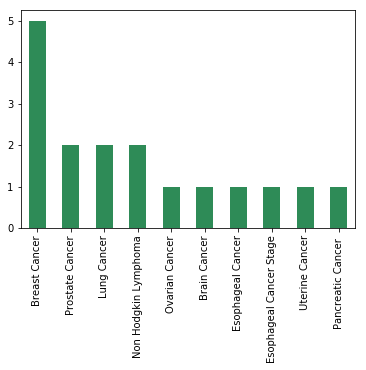

In [234]:
patients_summary.Cancer_Type.value_counts().plot(kind='bar',color='seagreen')

**Most of the patients received both chemotherapy and radiation as part of their treatment**

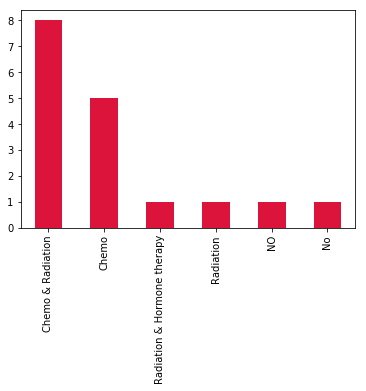

In [235]:
patients_summary['Chemotherapy/Radiation'].value_counts().plot(kind='bar',color='crimson')

## TextBlob for NLP

In [0]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [237]:
documents17[1]

't expecting a prostate cancer diagnosis when I agreed to have my PSA tested to help promote a local church health fair for homeless men  '

In [0]:
documents17_2=TextBlob(documents17[1])

In [0]:
polarity=[]
for i in documents17:
  my_sents=TextBlob(i)
  polarity.append([i,my_sents.sentiment.polarity])
  

In [0]:
structured_df=pd.DataFrame(polarity,columns=['Reviews','Polarity'])

In [277]:
structured_df.iloc[43,0]

'and I ve learned to work with both parties to get things done  '

In [274]:
structured_df.iloc[8,1]

-0.1

In [273]:
structured_df

,Reviews,Polarity
0,In 2007 I wasn,0.000000
1,t expecting a prostate cancer diagnosis when I...,0.350000
2,This kind of community activity was part of my...,0.600000
3,I had been to the doctor just six months earli...,0.466667
4,I was directed to consult a physician because ...,-0.700000
5,At first I only told my daughter Camille bu...,0.162500
6,I went public to both my family and my legisla...,0.000000
7,My main concern though was making sure the c...,0.333333
8,I completed roughly a year of treatment inclu...,-0.100000
9,Everything remained stable But two years late...,0.000000


## Polarity and sentiment 
**The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.**

In [255]:
documents17_2.sentiment.polarity

0.35

## Classification<br/>
Let's see how we can use TextBlob to predict sentiment of some sentences

In [0]:
train = [('I live there today with my husband and three wonderful children.', 'pos'),
 ('I work as an assistant principal in the same school district my children attend.', 'pos'),
 ('I live a beautiful life there, taking advantage of the water and often enjoying time out on the boat.', 'pos'),
 ('One day in September 2015, I felt a lump in my left breast.', 'neg'),
 ('I am not an alarmist, but I am also very educated and aware of what that could mean', 'pos'),
 ('I had an appointment scheduled in a month with my OB/GYN, so at first, I thought I would wait and talk to my doctor about it then.', 'pos'),
 ('I’d never had this examination before, and the time had come.', 'neg'),
 ("I can't deal with this", 'neg'),
 ('In the meantime, something very strange was happening in our lives', 'neg'),
 ('My mother has a friend I also know.', 'neg')]

In [241]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
cl=NaiveBayesClassifier(train)

In [0]:
blob=TextBlob(str(documents5[1:12]),classifier=cl)

In [244]:
for s in blob.sentences:
  print(s)
  print(s.classify())

['One day in 2012, three of the fingers in my left hand suddenly lost their feeling.
neg
', 'My family—me, my wife, Amber, and our four sons—were living in Arizona at the time, and I made an appointment to see a doctor right away.
pos
', 'The feeling was restored by the time my physician could see me, but Amber convinced me to proceed with the appointment.
neg
', 'I had an X-ray to see if the spine showed any signs of damage, perhaps from truck driving.
neg
', 'When some suspicious spots turned up on the film, my doctor recommended an MRI of my brain.
pos
', 'The MRI set off alarm bells.
neg
', 'The image showed lesions in my brain and a large mass at the front.
neg
', 'My doctor urged me to see a neurologist immediately.
neg
', 'After several tests, the neurologist thought I had multiple sclerosis, or MS, which as I understand, may look similar to cancer.
neg
', 'Wanting to know all of our options, my wife and I decided to seek a second opinion.
neg
', 'Again, after several tests, the

## 5. Word2Vec
Let' see how we can use word2vec on the all the reviews given. We will train a w2v model that we can further use for any classification task

In [0]:
import gensim

In [0]:
cancer_document=[]
for doc in df['Detail']:
  cancer_document.append(doc.split(' '))

In [0]:
model=gensim.models.Word2Vec(cancer_document,                                    # List of reviews
                          min_count=6,                                          # we want words appearing atleast 6 times in the vocab otherwise ignore 
                          workers=4,                                             # Use these many worker threads to train the model (=faster training with multicore machines
                           size=50,                                              # it means aword is represented by 50 numbers,in other words the number of neorons in hidden layer is 50 
                          window=5)

In [248]:
model.wv.vector_size

50

In [249]:
model.wv.vectors.shape

(1432, 50)

**Let's find most similar word of some given word. The most similar words are neighboring words of the given words like(beautiful,cancer,care)**

In [250]:
model.wv.most_similar("beautiful")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('liver', 0.9987794160842896),
 ('While', 0.99857497215271),
 ('mind', 0.9985440373420715),
 ('next', 0.9985252618789673),
 ('diagnosis', 0.9985252022743225),
 ('on', 0.9985173940658569),
 ('bladder', 0.9985123872756958),
 ('tissue', 0.9984858632087708),
 ('lung', 0.9984841346740723),
 ('enjoy', 0.998473584651947)]

In [251]:
model.wv.most_similar("cancer")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('diagnosed', 0.9995271563529968),
 ('hard', 0.9993916749954224),
 ('his', 0.9993816614151001),
 ('stage', 0.9993484020233154),
 ('even', 0.9993470907211304),
 ('He', 0.999340832233429),
 ('s', 0.9993158578872681),
 ('put', 0.9992834329605103),
 ('PSA', 0.9992772936820984),
 ('another', 0.9992730617523193)]

In [252]:
model.wv.most_similar('surgery')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('next', 0.9995052814483643),
 ('procedure', 0.9994642734527588),
 ('first', 0.9994460940361023),
 ('tumor', 0.9994216561317444),
 ('doctor', 0.9994085431098938),
 ('showed', 0.9993649125099182),
 ('biopsy', 0.9993501901626587),
 ('then', 0.999330997467041),
 ('confirmed', 0.9993121027946472),
 ('tissue', 0.9993047714233398)]

In [253]:
model.wv.most_similar("care")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('team', 0.9985474944114685),
 ('doctors', 0.99852454662323),
 ('clinicians', 0.9984331727027893),
 ('supportive', 0.9984114766120911),
 ('treatment', 0.99837726354599),
 ('including', 0.9983729720115662),
 ('who', 0.9983490705490112),
 ('therapy', 0.99830561876297),
 ('from', 0.9983008503913879),
 ('met', 0.9982681274414062)]

We can save the model for classification of similar data

In [0]:
model.save("word2vec cancer") 